<a href="https://colab.research.google.com/github/nfahrisalim/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Merge all datasets

In [ ]:
# # Daftar nama file CSV
# file_list = ['dataset/reviews_0-250.csv', 'dataset/reviews_250-500.csv', 'dataset/reviews_500-750.csv', 'dataset/reviews_750-1250.csv', 'dataset/reviews_1250-end.csv']

# # Membuat list kosong untuk menyimpan DataFrame
# dfs = []

# # Membaca setiap file CSV dan menambahkannya ke list
# for file in file_list:
#     df = pd.read_csv(file)
#     dfs.append(df)

# # Menggabungkan semua DataFrame menjadi satu
# combined_df = pd.concat(dfs, ignore_index=True)

# # Menyimpan DataFrame ke file CSV baru
# combined_df.to_csv('combined_datasets.csv', index=False)

### Load data

In [ ]:
try:
    df = pd.read_csv('/content/drive/MyDrive/PDS_Kelompok_4/combined_datasets.csv', engine='python')
except pd.errors.ParserError as e:
    print("ParserError:", e)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PDS_Kelompok_4/combined_datasets.csv'

### Explore data

In [ ]:
df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5.0,1.0,1.0,2.0,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1.0,0.0,NaN,0.0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5.0,1.0,NaN,0.0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5.0,1.0,NaN,0.0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5.0,1.0,NaN,0.0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095112 entries, 0 to 1095111
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1095112 non-null  object 
 1   author_id                 1094806 non-null  object 
 2   rating                    1094411 non-null  float64
 3   is_recommended            926423 non-null   float64
 4   helpfulness               533071 non-null   object 
 5   total_feedback_count      1094411 non-null  float64
 6   total_neg_feedback_count  1094837 non-null  object 
 7   total_pos_feedback_count  1094837 non-null  object 
 8   submission_time           1094837 non-null  object 
 9   review_text               1093393 non-null  object 
 10  review_title              783362 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

In [ ]:
# Check the DataFrame size
df.shape

(1095112, 19)

In [ ]:
df.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
author_id,306
rating,701
is_recommended,168689
helpfulness,562041
total_feedback_count,701
total_neg_feedback_count,275
total_pos_feedback_count,275
submission_time,275
review_text,1719


In [ ]:
df.duplicated().sum()

25

Agar tidak banyak data yang terhapus, maka kami harus features selection terlebih dahulu.
Target fitur kami adalah fitur is_recommended, sehingga kami mengubah namanya menjadi label dan tipe datanya menjadi integer

Namun, kita harus menghapus nilai NaN pada kolom label terlebih dahulu

In [ ]:
df.rename(columns={'is_recommended':'label'},  inplace=True)
df = df.dropna(subset='label')
df['label'] = df['label'].astype(int)

<ipython-input-13-847635614be6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype(int)


Drop kolom yang tidak memiliki kontribusi langsung pada kolom label

In [ ]:
df = df.drop(['Unnamed: 0', 'author_id', 'product_id', 'submission_time'], axis=1)
df.head()

,rating,label,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_name,brand_name,price_usd
0,5.0,1,1.0,2.0,0,2,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1.0,0,NaN,0.0,0,0,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5.0,1,NaN,0.0,0,0,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,5.0,1,NaN,0.0,0,0,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,5.0,1,NaN,0.0,0,0,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


Menghitung jumlah ulasan positif dan negatif dengan memisalkan ulasan positif jika label = 1 dan negatif jika label = 0

In [ ]:
totalReviews = len(df)

# Pisahkan fitur (X) dan label (y)
X = df.drop('label', axis=1)  # Menghapus kolom 'label' dari fitur
y = df['label']  # Menggunakan kolom 'label' sebagai target

# kategori positif
totalPositif = y.value_counts()[1]
persentasePositif = round(totalPositif / totalReviews * 100, 2)

# kategori negatif
totalNegatif = y.value_counts()[0]
persentaseNegatif = round(totalNegatif / totalReviews * 100, 2)

print("Positive: ", totalPositif)
print("Persentase Positive: ", persentasePositif, "%")
print("Negative: ", totalNegatif)
print("Persentase Negative: ", persentaseNegatif, "%")

Positive:  778160
Persentase Positive:  84.0 %
Negative:  148263
Persentase Negative:  16.0 %


Terdapat ketidakseimbangan antara ulasan positif dan ulasan negatif. Karena jumlah data cukup banyak, maka kami melakukan undersampling

In [ ]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

print("Sebelum undersampling:")
print("Jumlah positif:", totalPositif)
print("Jumlah negatif:", totalNegatif)

# Inisialisasi RandomUnderSampler dengan jumlah sampel sesuai jumlah negatif
under_sampler = RandomUnderSampler(sampling_strategy={1: totalNegatif}, random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y)

# Menggabungkan kembali fitur dan label ke dalam DataFrame
dfUnder = pd.concat([pd.DataFrame(X_under, columns=X.columns), pd.DataFrame(y_under, columns=['label'])], axis=1)

totalPositifAfter = y_under.value_counts()[1]
totalNegatifAfter = y_under.value_counts()[0]

print("\nSetelah undersampling:")
print("Jumlah positif:", totalPositifAfter)
print("Jumlah negatif:", totalNegatifAfter)

Sebelum undersampling:
Jumlah positif: 778160
Jumlah negatif: 148263

Setelah undersampling:
Jumlah positif: 148263
Jumlah negatif: 148263


In [ ]:
dfUnder.shape

(296526, 15)

In [ ]:
dfUnder.isnull().sum()

,0
rating,0
helpfulness,123306
total_feedback_count,0
total_neg_feedback_count,0
total_pos_feedback_count,0
review_text,474
review_title,90455
skin_tone,12666
eye_color,15047
skin_type,6485


In [ ]:
dfUnder.duplicated().sum()

21

Mencari korelasi pada data numerik

In [ ]:
columns_to_convert = ['helpfulness', 'total_neg_feedback_count', 'total_pos_feedback_count']
df_selected = dfUnder.copy()
for col in columns_to_convert:
    if col in df_selected.columns:  # Pastikan kolom ada di DataFrame
        try:
            df_selected[col] = df_selected[col].fillna(0)
            df_selected[col] = df_selected[col].astype(int)
        except ValueError:
            print(f"Kolom '{col}' tidak dapat dikonversi ke integer.")

Kolom 'helpfulness' tidak dapat dikonversi ke integer.


In [ ]:
df_selected['helpfulness'] =  df_selected['helpfulness'].astype(float)

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296526 entries, 1 to 671806
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   rating                    296526 non-null  float64
 1   helpfulness               296526 non-null  float64
 2   total_feedback_count      296526 non-null  float64
 3   total_neg_feedback_count  296526 non-null  int64  
 4   total_pos_feedback_count  296526 non-null  int64  
 5   review_text               296052 non-null  object 
 6   review_title              206071 non-null  object 
 7   skin_tone                 283860 non-null  object 
 8   eye_color                 281479 non-null  object 
 9   skin_type                 290041 non-null  object 
 10  hair_color                277281 non-null  object 
 11  product_name              296526 non-null  object 
 12  brand_name                296526 non-null  object 
 13  price_usd                 296526 non-null  float6

In [ ]:
df_selected.head()

,rating,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_name,brand_name,price_usd,label
1,1.0,0.000000,0.0,0,0,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0
6,2.0,0.250000,8.0,6,2,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0
13,1.0,0.444444,9.0,5,4,Honestly I was so excited when I got this in t...,I WISHED I LOVED THIS (not clean ingredients),NaN,brown,dry,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0
14,3.0,0.000000,0.0,0,0,Does the gummy bear mask smell absolutely deli...,Just meh,fair,blue,combination,blonde,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0
20,2.0,0.000000,1.0,1,0,There’s nothing wrong with it but i think it w...,"Not cruelty free, overhyped on tiktok.",light,blue,combination,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0


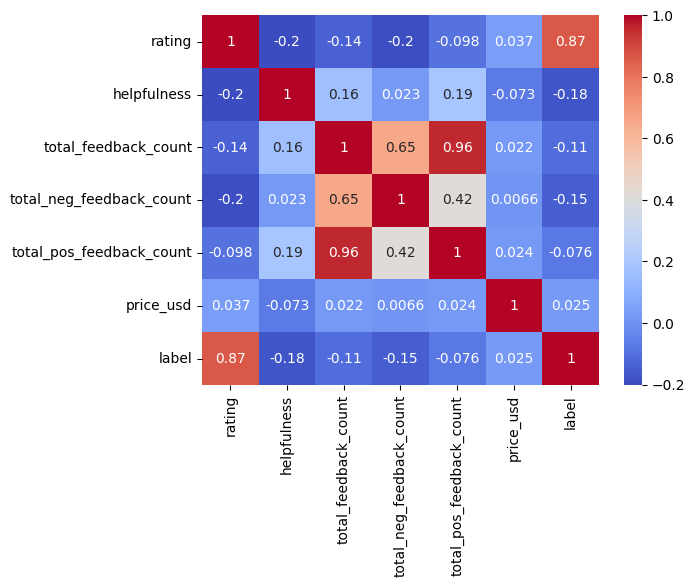

In [ ]:
numericalDf = df_selected.select_dtypes(include=['float64', 'int64'])
corrMatrix = numericalDf.corr()
correlation_with_label = corrMatrix['label'].abs().sort_values(ascending=False)

# Pilih fitur yang berkorelasi tinggi dengan label
selected_features = correlation_with_label[correlation_with_label > 0.1].index.tolist()
selected_features.remove('label')  # Hapus kolom target

dfNumSelected = numericalDf[selected_features + ['label']]

sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df_selected = df_selected.drop(
    ['helpfulness',
     'total_feedback_count',
     'total_neg_feedback_count',
     'total_pos_feedback_count',
     'price_usd'], axis=1)

In [ ]:
df_selected.head()

,rating,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_name,brand_name,label
1,1.0,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,0
6,2.0,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,0
13,1.0,Honestly I was so excited when I got this in t...,I WISHED I LOVED THIS (not clean ingredients),NaN,brown,dry,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,0
14,3.0,Does the gummy bear mask smell absolutely deli...,Just meh,fair,blue,combination,blonde,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,0
20,2.0,There’s nothing wrong with it but i think it w...,"Not cruelty free, overhyped on tiktok.",light,blue,combination,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,0


Menghapus kolom kategorikal yang tidak berkorelasi

In [ ]:
selectedDf = dfUnder[['rating', 'label', 'product_name', 'review_text']].copy()
selectedDf.head()

,rating,label,product_name,review_text
1,1.0,0,Lip Sleeping Mask Intense Hydration with Vitam...,I bought this lip mask after reading the revie...
6,2.0,0,Lip Sleeping Mask Intense Hydration with Vitam...,I’ll give this 2 stars for nice packaging and ...
13,1.0,0,Lip Sleeping Mask Intense Hydration with Vitam...,Honestly I was so excited when I got this in t...
14,3.0,0,Lip Sleeping Mask Intense Hydration with Vitam...,Does the gummy bear mask smell absolutely deli...
20,2.0,0,Lip Sleeping Mask Intense Hydration with Vitam...,There’s nothing wrong with it but i think it w...


In [ ]:
selectedDf.shape

(296526, 4)

In [ ]:
print(selectedDf[selectedDf['review_text'].isna()])

        rating  label                                       product_name  \
8748       2.0      0  Lip Sleeping Mask Intense Hydration with Vitam...   
9061       2.0      0  Lip Sleeping Mask Intense Hydration with Vitam...   
9277       3.0      0  Lip Sleeping Mask Intense Hydration with Vitam...   
17535      1.0      0                 Soy Hydrating Gentle Face Cleanser   
25465      1.0      0                         100 percent Pure Argan Oil   
...        ...    ...                                                ...   
43501      5.0      1          Alpha Beta Extra Strength Daily Peel Pads   
432950     5.0      1  Hello FAB Coconut Skin Smoothie Priming Moistu...   
44701      5.0      1          Alpha Beta Extra Strength Daily Peel Pads   
467925     5.0      1                  Creamy Eye Treatment with Avocado   
770080     4.0      1  Skin Squad Pre + ProbioticSupplement for Acne-...   

       review_text  
8748           NaN  
9061           NaN  
9277           NaN  
175

In [ ]:
selectedDf = selectedDf.dropna()

In [ ]:
selectedDf.shape

(296052, 4)

In [ ]:
selectedDf.duplicated().sum()

435

In [ ]:
selectedDf = selectedDf.drop_duplicates()

In [ ]:
selectedDf.shape

(295617, 4)

In [ ]:
totalReviews = len(selectedDf)

# Pisahkan fitur (X) dan label (y)
X = selectedDf.drop('label', axis=1)  # Menghapus kolom 'label' dari fitur
y = selectedDf['label']  # Menggunakan kolom 'label' sebagai target

# kategori positif
totalPositif = y.value_counts()[1]
persentasePositif = round(totalPositif / totalReviews * 100, 2)

# kategori negatif
totalNegatif = y.value_counts()[0]
persentaseNegatif = round(totalNegatif / totalReviews * 100, 2)

print("Positive: ", totalPositif)
print("Persentase Positive: ", persentasePositif, "%")
print("Negative: ", totalNegatif)
print("Persentase Negative: ", persentaseNegatif, "%")

Positive:  147963
Persentase Positive:  50.05 %
Negative:  147654
Persentase Negative:  49.95 %


Undersampling

In [ ]:
print("Sebelum undersampling:")
print("Jumlah positif:", totalPositif)
print("Jumlah negatif:", totalNegatif)

# Inisialisasi RandomUnderSampler dengan jumlah sampel sesuai jumlah negatif
under_sampler = RandomUnderSampler(sampling_strategy={1: totalNegatif}, random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y)

# Menggabungkan kembali fitur dan label ke dalam DataFrame
dfUnderNew = pd.concat([pd.DataFrame(X_under, columns=X.columns), pd.DataFrame(y_under, columns=['label'])], axis=1)

totalPositifAfter = y_under.value_counts()[1]
totalNegatifAfter = y_under.value_counts()[0]

print("\nSetelah undersampling:")
print("Jumlah positif:", totalPositifAfter)
print("Jumlah negatif:", totalNegatifAfter)

Sebelum undersampling:
Jumlah positif: 147963
Jumlah negatif: 147654

Setelah undersampling:
Jumlah positif: 147654
Jumlah negatif: 147654


In [ ]:
dfUnderNew.shape

(295308, 4)

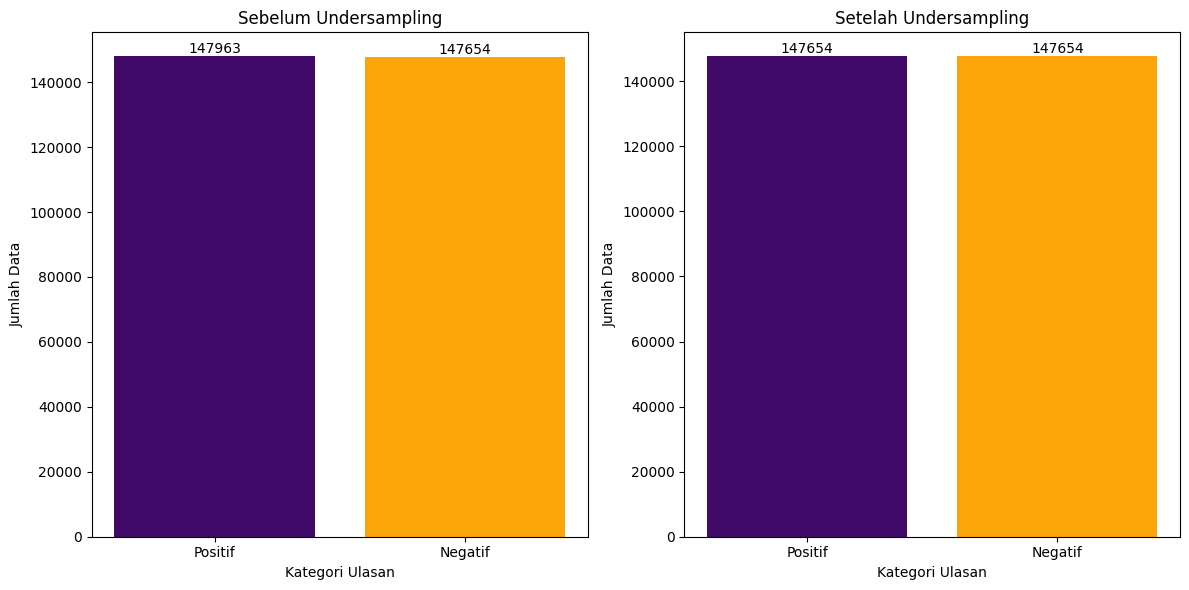

In [ ]:
# Data untuk plotting
dataSebelum = [totalPositif, totalNegatif]
dataSesudah = [totalPositifAfter, totalNegatifAfter]

# Plotting dengan warna gradien
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Membuat gradien pada batang
def barplot(ax, data, cmap, title):
    bars = ax.bar(['Positif', 'Negatif'], data, color=plt.get_cmap(cmap)([0.2, 0.8]))
    # Menambahkan label pada puncak setiap batang
    for bar in bars:
        height = bar.get_height()  # Mengambil tinggi batang (nilai)
        ax.text(bar.get_x() + bar.get_width() / 2, height,  # Posisi X dan Y untuk label
                str(height),  # Menampilkan nilai pada puncak batang
                ha='center', va='bottom', color='black')  # Menyesuaikan label posisi dan ukuran font
    ax.set_title(title)
    ax.set_xlabel('Kategori Ulasan')
    ax.set_ylabel('Jumlah Data')

# Plot Sebelum Undersampling
barplot(ax[0], dataSebelum, 'inferno', 'Sebelum Undersampling')

# Plot Setelah Undersampling
barplot(ax[1], dataSesudah, 'inferno', 'Setelah Undersampling')

plt.tight_layout()
plt.show()

Data Splitting

In [ ]:
# from sklearn.model_selection import train_test_split

# # 1. Bagi dataset menjadi data training (70%) dan data sementara (30%) secara stratified
# train_data, temp_data = train_test_split(dfUnderNew, test_size=0.3, stratify=dfUnderNew['label'], random_state=42)

# # 2. Bagi data sementara menjadi validasi (15%) dan testing (15%) secara stratified
# val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['label'], random_state=42)

# # 3. Simpan setiap subset ke dalam file CSV
# train_data.to_csv('/content/drive/MyDrive/PDS_Kelompok_4/dataSplit/train_data.csv', index=False)
# val_data.to_csv('/content/drive/MyDrive/PDS_Kelompok_4/dataSplit/val_data.csv', index=False)
# test_data.to_csv('/content/drive/MyDrive/PDS_Kelompok_4/dataSplit/test_data.csv', index=False)

# # Mengecek proporsi data
# print("Training data:", len(train_data))
# print("Validation data:", len(val_data))
# print("Testing data:", len(test_data))

### Modeling

In [ ]:
# Memuat dataset
trainDf = pd.read_csv('/content/drive/MyDrive/PDS_Kelompok_4/split_data/train_split.csv')
testDf = pd.read_csv('/content/drive/MyDrive/PDS_Kelompok_4/split_data/test_split.csv')


In [ ]:
trainDf.shape

(236246, 4)

In [ ]:
testDf.shape

(59062, 4)

Ekstraktor fitur menggunakan BERT

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
import time

# Load BERT tokenizer dan model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Konfigurasi hyperparameter
max_length = 128
batch_size = 64

# Fungsi ekstraksi fitur BERT dengan checkpoint
def bert_feature_extractor_with_checkpoint(texts, dataset_name, max_length=128, batch_size=64):
    save_dir = f'/content/drive/MyDrive/PDS_Kelompok_4/features_8-2/{dataset_name}'
    os.makedirs(save_dir, exist_ok=True)

    embeddings = []
    num_batches = len(texts) // batch_size + (1 if len(texts) % batch_size != 0 else 0)

    checkpoint_path = f'{save_dir}/bert_feature_extraction_checkpoint.pth'
    npy_checkpoint_path = f'{save_dir}/bert_feature_extraction_embeddings.npy'

    # Cek jika ada checkpoint untuk melanjutkan ekstraksi fitur
    start_batch = 0
    if os.path.exists(checkpoint_path):
        try:
            checkpoint = torch.load(checkpoint_path, map_location=device)
            embeddings = checkpoint['embeddings'].tolist()
            start_batch = checkpoint['start_batch']
            print(f"Resuming {dataset_name} from batch {start_batch}")
        except Exception as e:
            print(f"Failed to load checkpoint: {e}. Starting from batch 0.")
            start_batch = 0
            embeddings = []

    for i in tqdm(range(start_batch, num_batches), ncols=100):
        batch_texts = texts[i * batch_size: (i + 1) * batch_size]

        inputs = tokenizer(batch_texts, return_tensors='pt', truncation=True, padding='max_length', max_length=max_length)
        inputs = {key: val.to(device) for key, val in inputs.items()}

        start_time = time.time()
        with torch.no_grad():
            outputs = bert_model(**inputs)

        cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(cls_embeddings)

        # Simpan checkpoint setiap 100 batch
        if (i + 1) % 100 == 0 or (i + 1) == num_batches:
            checkpoint = {
                'embeddings': np.vstack(embeddings),
                'start_batch': i + 1
            }
            torch.save(checkpoint, checkpoint_path)
            print(f"Checkpoint saved for batch {i+1}.")

            elapsed_time = time.time() - start_time
            with open(os.path.join(save_dir, f'{dataset_name}_extraction_times.txt'), 'a') as f:
                f.write(f'Batch {i+1}: {elapsed_time:.2f} seconds\n')

        # Simpan batch ke file .npy setiap 500 batch
        if (i + 1) % 500 == 0:
            np.save(npy_checkpoint_path, np.vstack(embeddings))
            print(f"Saved embeddings to {npy_checkpoint_path}.")

    # Simpan hasil akhir sebagai numpy array
    final_embeddings = np.vstack(embeddings)
    np.save(os.path.join(save_dir, f'{dataset_name}_final_embeddings.npy'), final_embeddings)
    return final_embeddings

# Ekstraksi fitur untuk train, valid, dan test
print("Extracting BERT features...")

# Pastikan dataset `trainDf`, `validDf`, `testDf` sudah terdefinisi
try:
    X_train = bert_feature_extractor_with_checkpoint(trainDf['review_text'].tolist(), 'train', max_length, batch_size)
    X_test = bert_feature_extractor_with_checkpoint(testDf['review_text'].tolist(), 'test', max_length, batch_size)
except NameError as e:
    print(f"Error: {e}. Pastikan dataframe trainDf, testDf tersedia.")
except Exception as e:
    print(f"Unexpected error: {e}.")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Extracting BERT features...


<ipython-input-7-729543c26219>:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


Resuming train from batch 3692


0it [00:00, ?it/s]


Resuming test from batch 700


 44%|███████████████████████████▌                                  | 99/223 [00:53<01:06,  1.87it/s]

Checkpoint saved for batch 800.


 90%|██████████████████████████████████████████████████████▋      | 200/223 [01:58<00:57,  2.51s/it]

Checkpoint saved for batch 900.


100%|█████████████████████████████████████████████████████████████| 223/223 [02:21<00:00,  1.58it/s]

Checkpoint saved for batch 923.


In [ ]:
for i in ['train', 'test']:
  with open(f'/content/drive/MyDrive/PDS_Kelompok_4/features_8-2/{i}/{i}_extraction_times.txt', 'r') as file:
      total_time = 0.0
      for line in file:
          time_str = line.split(": ")[1].split()[0]
          total_time += float(time_str)

  if i == 'train': kata = 'training'
  elif i == 'valid': kata = 'validation'
  else: kata = 'testing'

  with open(f'/content/drive/MyDrive/PDS_Kelompok_4/features_8-2/{i}/{i}_extraction_times.txt', 'a') as file:
      file.write(f"\nTotal waktu ekstraksi fitur {kata}_dataset (64 batch): {total_time:.2f} seconds\n")

Memuat fitur

In [ ]:
# Memuat fitur dari train, valid, dan test
X_train = np.load('/content/drive/MyDrive/PDS_Kelompok_4/features_8-2/train/train_final_embeddings.npy')
X_test = np.load('/content/drive/MyDrive/PDS_Kelompok_4/features_8-2/test/test_final_embeddings.npy')

# Memuat label dari dataset
y_train = trainDf['label']
y_test = testDf['label']

### Classification using Logistic Regression

Training model serta mencari best hyperparameter-nya

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Fungsi untuk melatih model Logistic Regression dengan RandomizedSearchCV
def train_logistic_regression_with_randomized_search(X_train, y_train, checkpoint_path):
    # Cek apakah model Logistic Regression sudah ada di checkpoint
    if os.path.exists(checkpoint_path):
        print(f"Loading Logistic Regression model from {checkpoint_path}...")
        model = joblib.load(checkpoint_path)
    else:
        print("Training Logistic Regression model with hyperparameter tuning using RandomizedSearchCV...")

        # Menentukan parameter distribusi untuk RandomizedSearchCV
        param_dist = {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'lbfgs'],
            'max_iter': [100, 200, 500],
        }

        # Membuat model Logistic Regression dengan warm_start
        logreg = LogisticRegression(random_state=42, warm_start=True)

        # Menyiapkan RandomizedSearchCV untuk hyperparameter tuning
        random_search = RandomizedSearchCV(
            logreg, param_dist, n_iter=10, cv=3, verbose=1, n_jobs=-1, random_state=42
        )

        # Menggunakan subset data untuk mempercepat pencarian hyperparameter
        X_train_subset = X_train[:10000]  # Ambil 10000 data pertama
        y_train_subset = y_train[:10000]

        # Melakukan fitting untuk menemukan hyperparameter terbaik
        random_search.fit(X_train_subset, y_train_subset)

        # Menyimpan model terbaik dari RandomizedSearchCV
        model = random_search.best_estimator_

        # Menyimpan model terlatih ke checkpoint
        joblib.dump(model, checkpoint_path)
        print(f"Best model saved to {checkpoint_path}.")

    return model

# Checkpoint path
logreg_train_checkpoint = '/content/drive/MyDrive/PDS_Kelompok_4/models_8-2/logreg_train_checkpoint_randomized.joblib'

# Latih model Logistic Regression dengan hyperparameter tuning menggunakan RandomizedSearchCV
logreg_model_tuned = train_logistic_regression_with_randomized_search(X_train, y_train, logreg_train_checkpoint)

Training Logistic Regression model with hyperparameter tuning using RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PDS_Kelompok_4/models_8-2/logreg_train_checkpoint_randomized.joblib'

Menampilkan hyperparameters terbaik

In [ ]:
best_params = logreg_model_tuned.get_params()

# Mengubah ke DataFrame untuk tampilan yang lebih rapi
best_params_df = pd.DataFrame(list(best_params.items()), columns=['Parameter', 'Value'])

best_params_df

            Parameter       Value
0                   C         0.1
1        class_weight        None
2                dual       False
3       fit_intercept        True
4   intercept_scaling           1
5            l1_ratio        None
6            max_iter         100
7         multi_class  deprecated
8              n_jobs        None
9             penalty          l1
10       random_state          42
11             solver   liblinear
12                tol      0.0001
13            verbose           0
14         warm_start        True


,Parameter,Value
0,C,0.1
1,class_weight,None
2,dual,False
3,fit_intercept,True
4,intercept_scaling,1
5,l1_ratio,None
6,max_iter,100
7,multi_class,deprecated
8,n_jobs,None
9,penalty,l1


Cek manual menggunakan learning curve

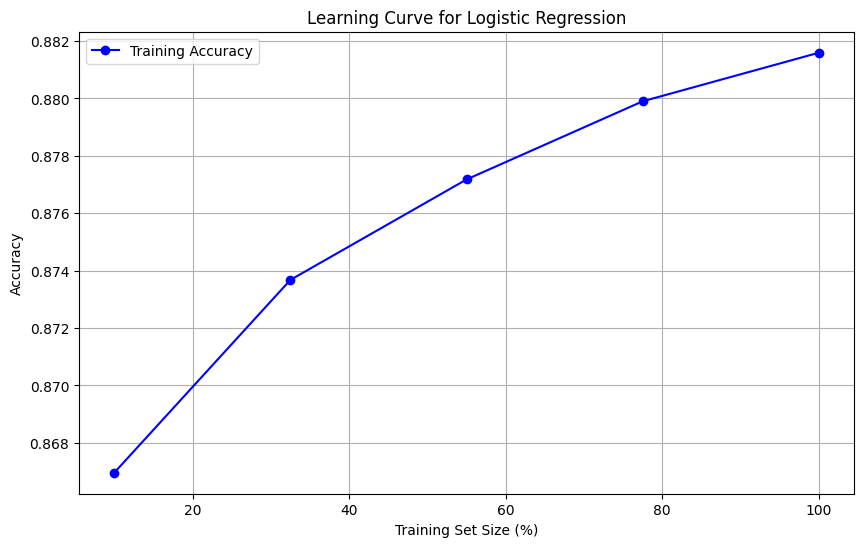

In [ ]:
# Parameter terbaik yang telah ditemukan
best_params = {
    'C': 0.001,
    'class_weight': None,
    'fit_intercept': True,
    'dual': False,
    'fit_intercept': True,
    'intercept_scaling': 1,
    'max_iter': 500,
    'n_jobs': None,
    'penalty': 'l2',
    'random_state': 42,
    'solver': 'lbfgs',
    'tol': 0.00001,
    'verbose': 0,
    'warm_start': True
}

# Membuat model Logistic Regression dengan parameter terbaik
model = LogisticRegression(**best_params)

# Menentukan ukuran subset data latih yang akan digunakan
train_sizes = np.linspace(0.1, 1.0, 5)

# Menyimpan hasil akurasi
train_scores = []

# Loop melalui berbagai ukuran data pelatihan
for size in train_sizes:
    # Tentukan jumlah sampel data latih berdasarkan persentase size
    train_size = int(size * len(X_train))

    # Ambil subset data latih
    X_train_subset = X_train[:train_size]
    y_train_subset = y_train[:train_size]

    # Latih model dengan subset data
    model.fit(X_train_subset, y_train_subset)

    # Hitung akurasi pada data latih
    train_accuracy = accuracy_score(y_train_subset, model.predict(X_train_subset))
    train_scores.append(train_accuracy)

# Konversi list menjadi array untuk keperluan plotting
train_scores = np.array(train_scores)

joblib.dump(model, '/content/drive/MyDrive/PDS_Kelompok_4/models/logreg_train_checkpoint_4.joblib')

# Visualisasi Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, train_scores, label='Training Accuracy', color='blue', marker='o')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

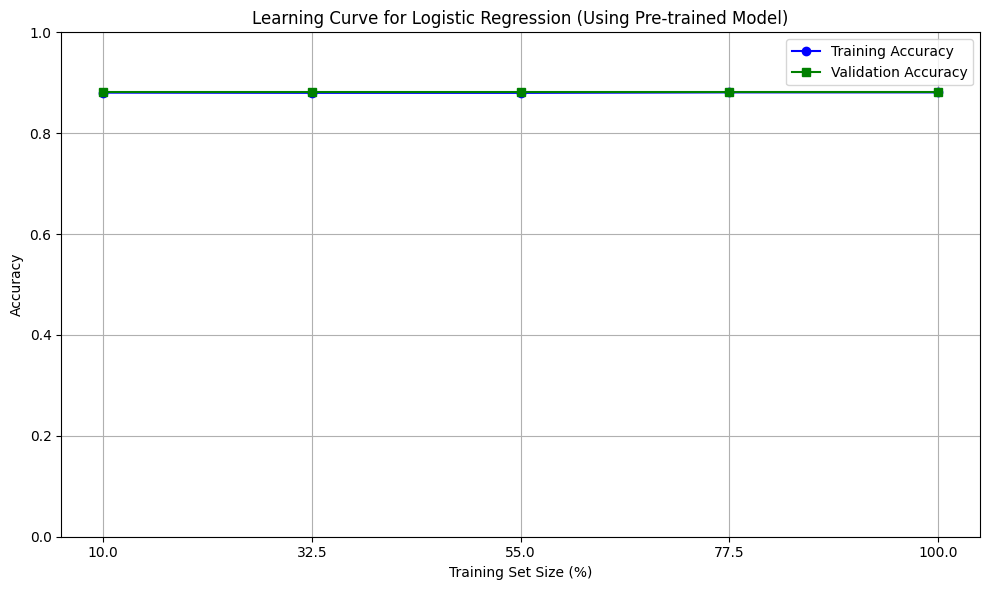

In [ ]:
model_path = '/content/drive/MyDrive/PDS_Kelompok_4/models/logreg_train_checkpoint_4.joblib'
logreg_model = joblib.load(model_path)

train_sizes = np.linspace(0.1, 1.0, 5)  # Menggunakan 10%, 25%, 50%, 75%, 100% dari data
train_scores = []

# Loop melalui berbagai ukuran data pelatihan
for size in train_sizes:
    # Tentukan jumlah sampel data latih berdasarkan persentase size
    train_size = int(size * len(X_train))

    # Ambil subset data latih
    X_train_subset = X_train[:train_size]
    y_train_subset = y_train[:train_size]

    # Menggunakan model yang sudah dilatih untuk memprediksi subset data
    train_accuracy = accuracy_score(y_train_subset, logreg_model.predict(X_train_subset))
    train_scores.append(train_accuracy)


# Langkah 3: Visualisasi Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, train_scores, label='Training Accuracy', color='blue', marker='o')
plt.plot(train_sizes * 100, valid_scores, label='Validation Accuracy', color='green', marker='s')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression (Using Pre-trained Model)')
plt.xticks(train_sizes * 100)  # Menampilkan titik-titik ukuran pelatihan
plt.ylim(0.0, 1.0)  # Batasan sumbu Y dari 0 hingga 1
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Model dengan hyperparameter berdasarkan RandomizedSearchCV


Evaluating on validation data...
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     22148
           1       0.88      0.87      0.87     22148

    accuracy                           0.88     44296
   macro avg       0.88      0.88      0.88     44296
weighted avg       0.88      0.88      0.88     44296

Confusion Matrix (Validation):
[[19567  2581]
 [ 2954 19194]]


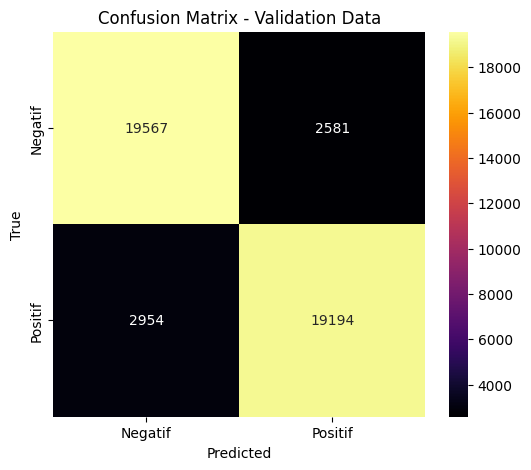

Validation Accuracy: 0.8750

Evaluating on test data...
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     22149
           1       0.88      0.86      0.87     22148

    accuracy                           0.87     44297
   macro avg       0.87      0.87      0.87     44297
weighted avg       0.87      0.87      0.87     44297

Confusion Matrix (Test):
[[19617  2532]
 [ 3048 19100]]


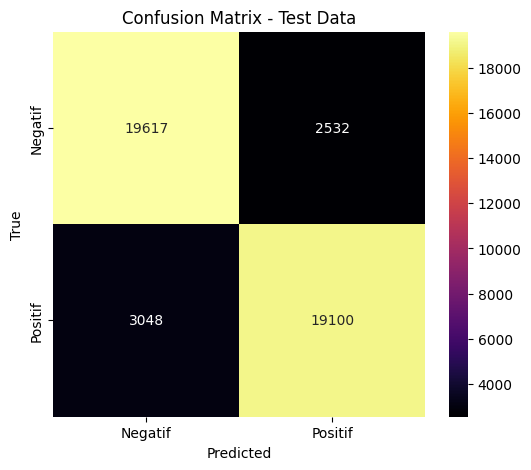

Test Accuracy: 0.8740


In [ ]:
model_path = '/content/drive/MyDrive/PDS_Kelompok_4/models/logreg_train_checkpoint_randomized.joblib'
loaded_model = joblib.load(model_path)

# Fungsi untuk validasi model menggunakan data validasi
def validate_model(model, X_valid, y_valid):
    print("\nEvaluating on validation data...")
    y_pred_valid = model.predict(X_valid)

    # Menampilkan classification report untuk validasi
    print("Classification Report (Validation):")
    print(classification_report(y_valid, y_pred_valid))

    # Menampilkan confusion matrix untuk validasi
    print("Confusion Matrix (Validation):")
    cm_valid = confusion_matrix(y_valid, y_pred_valid)
    print(cm_valid)

    # Visualisasi confusion matrix untuk validasi
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_valid, annot=True, fmt='g', cmap='inferno', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
    plt.title("Confusion Matrix - Validation Data")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Menampilkan skor akurasi pada data validasi
    accuracy_valid = model.score(X_valid, y_valid)
    print(f"Validation Accuracy: {accuracy_valid:.4f}")

# Fungsi untuk menguji model menggunakan data test
def test_model(model, X_test, y_test):
    print("\nEvaluating on test data...")
    y_pred_test = model.predict(X_test)

    # Menampilkan classification report untuk test
    print("Classification Report (Test):")
    print(classification_report(y_test, y_pred_test))

    # Menampilkan confusion matrix untuk test
    print("Confusion Matrix (Test):")
    cm_test = confusion_matrix(y_test, y_pred_test)
    print(cm_test)

    # Visualisasi confusion matrix untuk test
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_test, annot=True, fmt='g', cmap='inferno', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
    plt.title("Confusion Matrix - Test Data")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Menampilkan skor akurasi pada data test
    accuracy_test = model.score(X_test, y_test)
    print(f"Test Accuracy: {accuracy_test:.4f}")

# Melakukan validasi dan testing
validate_model(loaded_model, X_valid, y_valid)
test_model(loaded_model, X_test, y_test)

Evaluasi dan tes model berdasarkan hyperparameter yg diperkirakan

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.87      0.90      0.89     29531
     Positif       0.89      0.87      0.88     29531

    accuracy                           0.88     59062
   macro avg       0.88      0.88      0.88     59062
weighted avg       0.88      0.88      0.88     59062



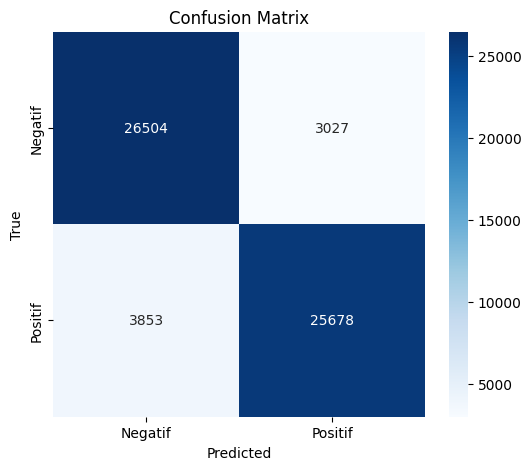

In [ ]:
model_path = '/content/drive/MyDrive/PDS_Kelompok_4/models/logreg_train_checkpoint_4.joblib'
loaded_model = joblib.load(model_path)

# # Fungsi untuk validasi model menggunakan data validasi
# def validate_model(model, X_valid, y_valid):
#     print("\nEvaluating on validation data...")
#     y_pred_valid = model.predict(X_valid)

#     # Menampilkan classification report untuk validasi
#     print("Classification Report (Validation):")
#     print(classification_report(y_valid, y_pred_valid))

#     # Menampilkan confusion matrix untuk validasi
#     print("Confusion Matrix (Validation):")
#     cm_valid = confusion_matrix(y_valid, y_pred_valid)
#     print(cm_valid)

#     # Visualisasi confusion matrix untuk validasi
#     plt.figure(figsize=(6, 5))
#     sns.heatmap(cm_valid, annot=True, fmt='g', cmap='inferno', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
#     plt.title("Confusion Matrix - Validation Data")
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.show()

#     # Menampilkan skor akurasi pada data validasi
#     accuracy_valid = model.score(X_valid, y_valid)
#     print(f"Validation Accuracy: {accuracy_valid:.4f}")

# Fungsi untuk menguji model menggunakan data test
def test_model(model, X_test, y_test):
    y_pred_test = model.predict(X_test)

    # Menampilkan classification report untuk test
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test, target_names=['Negatif', 'Positif']))

    cm_test = confusion_matrix(y_test, y_pred_test)

    # Visualisasi confusion matrix untuk test
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Menampilkan skor akurasi pada data test
    accuracy_test = model.score(X_test, y_test)

# Melakukan testing
test_model(loaded_model, X_test, y_test)

Memasukkan fitur sentiment

In [ ]:
# Muat model yang sudah dilatih (model logistic regression)
logreg_model_tuned = joblib.load(model_path)

# Muat embeddings dari file .npy
X_test_embeddings = np.load('/content/drive/MyDrive/PDS_Kelompok_4/features_8-2/test/test_final_embeddings.npy')

# Prediksi sentiment menggunakan model Logistic Regression
# Prediksi hasil sentimen (misalnya, 0 untuk negatif dan 1 untuk positif)
y_pred = logreg_model_tuned.predict(X_test_embeddings)

# Tambahkan kolom 'sentiment' ke DataFrame yang berisi hasil prediksi
testDf['sentiment'] = y_pred

In [ ]:
testDf.to_csv('test_with_sentiment_3.csv', index=False)

In [ ]:
testDf.head()

,rating,product_name,review_text,label,sentiment
0,2.0,Green Clean Makeup Removing Cleansing Balm,I love double cleansing and have been doing it...,0,0
1,2.0,Turmeric BHA Pore & Brightening Treatment Mask,Just couldnt stand the smell. I had high hopes...,0,0
2,5.0,Baby Pekee Bar + Juju Bar Travel Duo,been struggling with breakouts lately this cle...,1,1
3,4.0,The Deep Cleanse Gentle Exfoliating Cleanser,"Great cleaser for oily skin, but terrible pack...",1,0
4,4.0,"""B"" Oil",I use this on my body’s extremely dry scaly sk...,1,1


In [ ]:
# Muat model yang sudah dilatih (model logistic regression)
logreg_model_tuned = joblib.load(model_path)

# Muat embeddings dari file .npy
X_valid_embeddings = np.load('/content/drive/MyDrive/PDS_Kelompok_4/features/valid/valid_final_embeddings.npy')

# Prediksi sentiment menggunakan model Logistic Regression
# Prediksi hasil sentimen (misalnya, 0 untuk negatif dan 1 untuk positif)
y_pred = logreg_model_tuned.predict(X_valid_embeddings)

# Tambahkan kolom 'sentiment' ke DataFrame yang berisi hasil prediksi
validDf['sentiment'] = y_pred

In [ ]:
validDf.to_csv('valid_with_sentiment_2.csv', index=False)

In [ ]:
# Muat model yang sudah dilatih (model logistic regression)
logreg_model_tuned = joblib.load(model_path)

# Muat embeddings dari file .npy
X_train_embeddings = np.load('/content/drive/MyDrive/PDS_Kelompok_4/features_8-2/train/train_final_embeddings.npy')

# Prediksi sentiment menggunakan model Logistic Regression
# Prediksi hasil sentimen (misalnya, 0 untuk negatif dan 1 untuk positif)
y_pred = logreg_model_tuned.predict(X_train_embeddings)

# Tambahkan kolom 'sentiment' ke DataFrame yang berisi hasil prediksi
trainDf['sentiment'] = y_pred

In [ ]:
trainDf.to_csv('train_with_sentiment_3.csv', index=False)

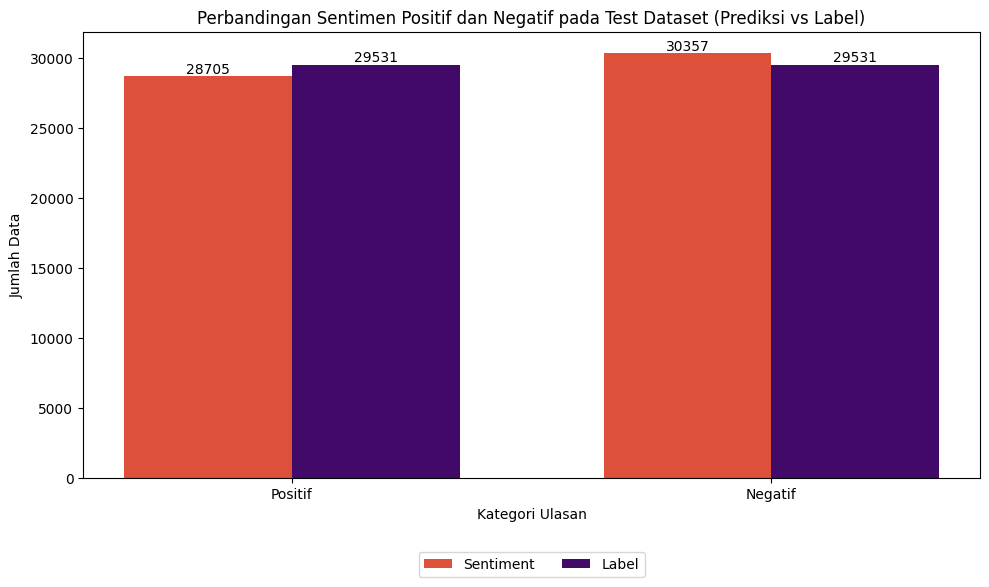

In [ ]:
# Menghitung jumlah prediksi dan label untuk sentimen positif dan negatif
positif_sentimen = testDf[testDf['sentiment'] == 1]['sentiment'].count()  # Sentimen Positif (prediksi)
negatif_sentimen = testDf[testDf['sentiment'] == 0]['sentiment'].count()  # Sentimen Negatif (prediksi)

positif_label = testDf[testDf['label'] == 1]['label'].count()  # Label Positif (asli)
negatif_label = testDf[testDf['label'] == 0]['label'].count()  # Label Negatif (asli)

# Membuat subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Data untuk barplot
sentiment_data = [positif_sentimen, negatif_sentimen]  # Sentimen Positif, Negatif (prediksi)
label_data = [positif_label, negatif_label]  # Label Positif, Negatif (asli)

# Menentukan posisi batang untuk 'sentiment' dan 'label'
bar_width = 0.35
index = ['Positif', 'Negatif']

# Membuat barplot untuk sentiment dan label asli dengan colormap Inferno
bars1 = ax.bar([0, 1], sentiment_data, bar_width, label='Sentiment', color=plt.get_cmap('inferno')(0.6))
bars2 = ax.bar([0 + bar_width, 1 + bar_width], label_data, bar_width, label='Label', color=plt.get_cmap('inferno')(0.2))

# Menambahkan label pada puncak setiap batang
for bar in bars1:
    height = bar.get_height()  # Mengambil tinggi batang (nilai)
    ax.text(bar.get_x() + bar.get_width() / 2, height,  # Posisi X dan Y untuk label
            str(height),  # Menampilkan nilai pada puncak batang
            ha='center', va='bottom', color='black')  # Menyesuaikan label posisi dan ukuran font

for bar in bars2:
    height = bar.get_height()  # Mengambil tinggi batang (nilai)
    ax.text(bar.get_x() + bar.get_width() / 2, height,  # Posisi X dan Y untuk label
            str(height),  # Menampilkan nilai pada puncak batang
            ha='center', va='bottom', color='black')  # Menyesuaikan label posisi dan ukuran font

# Menambahkan label dan judul
ax.set_xlabel('Kategori Ulasan')
ax.set_ylabel('Jumlah Data')
ax.set_title('Perbandingan Sentimen Positif dan Negatif pada Test Dataset (Prediksi vs Label)')
ax.set_xticks([0 + bar_width / 2, 1 + bar_width / 2])
ax.set_xticklabels(index)

# Menampilkan legenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Menampilkan plot
plt.tight_layout()
plt.show()

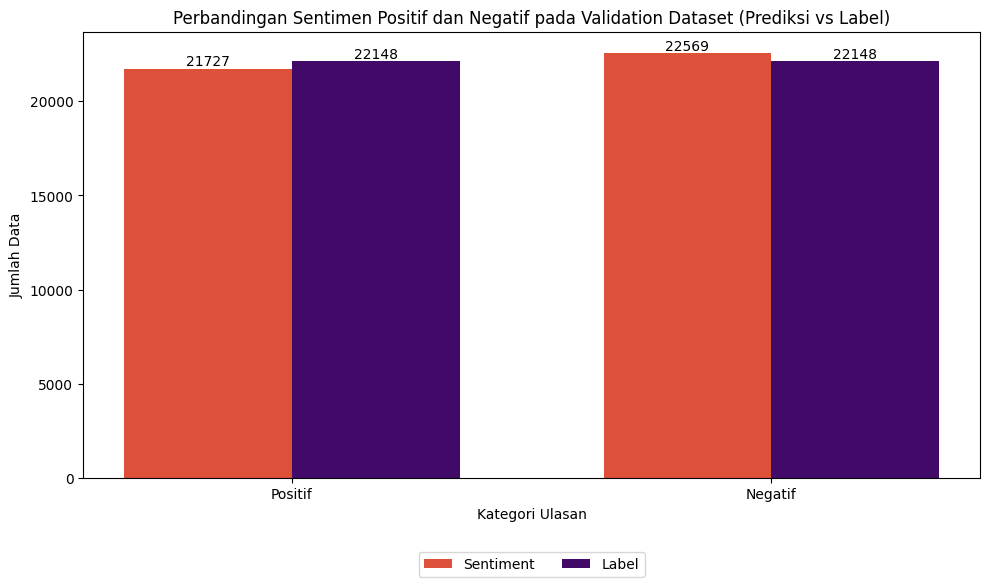

In [ ]:
# Menghitung jumlah prediksi dan label untuk sentimen positif dan negatif
positif_sentimen = validDf[validDf['sentiment'] == 1]['sentiment'].count()  # Sentimen Positif (prediksi)
negatif_sentimen = validDf[validDf['sentiment'] == 0]['sentiment'].count()  # Sentimen Negatif (prediksi)

positif_label = validDf[validDf['label'] == 1]['label'].count()  # Label Positif (asli)
negatif_label = validDf[validDf['label'] == 0]['label'].count()  # Label Negatif (asli)

# Membuat subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Data untuk barplot
sentiment_data = [positif_sentimen, negatif_sentimen]  # Sentimen Positif, Negatif (prediksi)
label_data = [positif_label, negatif_label]  # Label Positif, Negatif (asli)

# Menentukan posisi batang untuk 'sentiment' dan 'label'
bar_width = 0.35
index = ['Positif', 'Negatif']

# Membuat barplot untuk sentiment dan label asli dengan colormap Inferno
bars1 = ax.bar([0, 1], sentiment_data, bar_width, label='Sentiment', color=plt.get_cmap('inferno')(0.6))
bars2 = ax.bar([0 + bar_width, 1 + bar_width], label_data, bar_width, label='Label', color=plt.get_cmap('inferno')(0.2))

# Menambahkan label pada puncak setiap batang
for bar in bars1:
    height = bar.get_height()  # Mengambil tinggi batang (nilai)
    ax.text(bar.get_x() + bar.get_width() / 2, height,  # Posisi X dan Y untuk label
            str(height),  # Menampilkan nilai pada puncak batang
            ha='center', va='bottom', color='black')  # Menyesuaikan label posisi dan ukuran font

for bar in bars2:
    height = bar.get_height()  # Mengambil tinggi batang (nilai)
    ax.text(bar.get_x() + bar.get_width() / 2, height,  # Posisi X dan Y untuk label
            str(height),  # Menampilkan nilai pada puncak batang
            ha='center', va='bottom', color='black')  # Menyesuaikan label posisi dan ukuran font

# Menambahkan label dan judul
ax.set_xlabel('Kategori Ulasan')
ax.set_ylabel('Jumlah Data')
ax.set_title('Perbandingan Sentimen Positif dan Negatif pada Validation Dataset (Prediksi vs Label)')
ax.set_xticks([0 + bar_width / 2, 1 + bar_width / 2])
ax.set_xticklabels(index)

# Menampilkan legenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Menampilkan plot
plt.tight_layout()
plt.show()

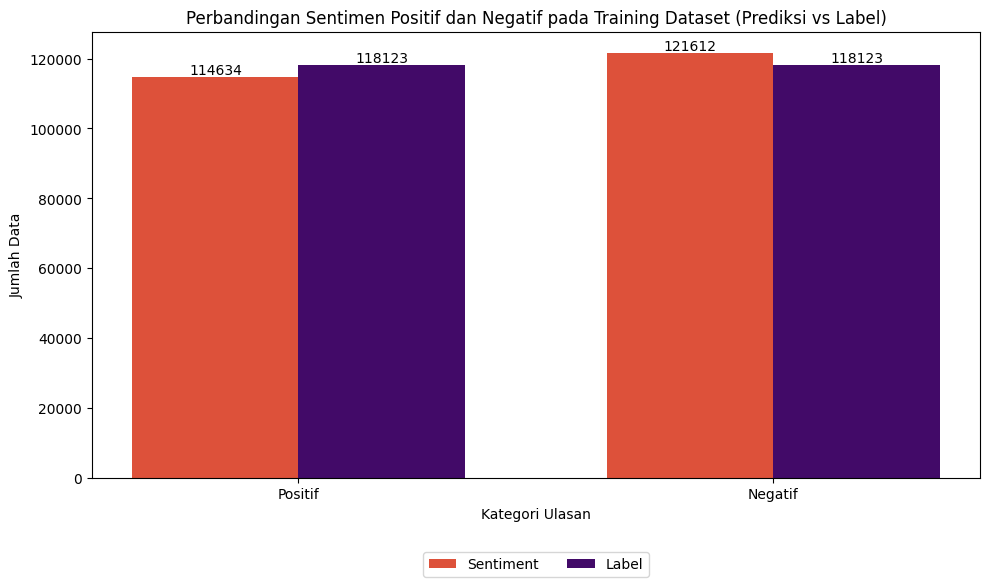

In [ ]:
# Menghitung jumlah prediksi dan label untuk sentimen positif dan negatif
positif_sentimen = trainDf[trainDf['sentiment'] == 1]['sentiment'].count()  # Sentimen Positif (prediksi)
negatif_sentimen = trainDf[trainDf['sentiment'] == 0]['sentiment'].count()  # Sentimen Negatif (prediksi)

positif_label = trainDf[trainDf['label'] == 1]['label'].count()  # Label Positif (asli)
negatif_label = trainDf[trainDf['label'] == 0]['label'].count()  # Label Negatif (asli)

# Membuat subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Data untuk barplot
sentiment_data = [positif_sentimen, negatif_sentimen]  # Sentimen Positif, Negatif (prediksi)
label_data = [positif_label, negatif_label]  # Label Positif, Negatif (asli)

# Menentukan posisi batang untuk 'sentiment' dan 'label'
bar_width = 0.35
index = ['Positif', 'Negatif']

# Membuat barplot untuk sentiment dan label asli dengan colormap Inferno
bars1 = ax.bar([0, 1], sentiment_data, bar_width, label='Sentiment', color=plt.get_cmap('inferno')(0.6))
bars2 = ax.bar([0 + bar_width, 1 + bar_width], label_data, bar_width, label='Label', color=plt.get_cmap('inferno')(0.2))

# Menambahkan label pada puncak setiap batang
for bar in bars1:
    height = bar.get_height()  # Mengambil tinggi batang (nilai)
    ax.text(bar.get_x() + bar.get_width() / 2, height,  # Posisi X dan Y untuk label
            str(height),  # Menampilkan nilai pada puncak batang
            ha='center', va='bottom', color='black')  # Menyesuaikan label posisi dan ukuran font

for bar in bars2:
    height = bar.get_height()  # Mengambil tinggi batang (nilai)
    ax.text(bar.get_x() + bar.get_width() / 2, height,  # Posisi X dan Y untuk label
            str(height),  # Menampilkan nilai pada puncak batang
            ha='center', va='bottom', color='black')  # Menyesuaikan label posisi dan ukuran font

# Menambahkan label dan judul
ax.set_xlabel('Kategori Ulasan')
ax.set_ylabel('Jumlah Data')
ax.set_title('Perbandingan Sentimen Positif dan Negatif pada Training Dataset (Prediksi vs Label)')
ax.set_xticks([0 + bar_width / 2, 1 + bar_width / 2])
ax.set_xticklabels(index)

# Menampilkan legenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Menampilkan plot
plt.tight_layout()
plt.show()

## FULL BERT

In [ ]:
from sklearn.model_selection import train_test_split

# Menggabungkan semua dataset
combinedDf = pd.concat([trainDf, testDf, validDf], ignore_index=True)
print(f"Total Data Gabungan: {combinedDf.shape}")

# Membagi data menjadi fitur (X) dan target (y)
X = combinedDf.drop(columns=['label'])  # Ganti 'label' dengan nama kolom target sebenarnya
y = combinedDf['label']

# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Data Latih: {X_train.shape}, Data Uji: {X_test.shape}")

# Menyimpan data latih
train_split = pd.concat([X_train, y_train], axis=1)
train_split.to_csv('/content/drive/MyDrive/PDS_Kelompok_4/split_data/train_split.csv', index=False)

# Menyimpan data uji
test_split = pd.concat([X_test, y_test], axis=1)
test_split.to_csv('/content/drive/MyDrive/PDS_Kelompok_4/split_data/test_split.csv', index=False)

print("Data latih dan data uji telah disimpan sebagai CSV.")

Total Data Gabungan: (295308, 4)
Data Latih: (236246, 3), Data Uji: (59062, 3)
Data latih dan data uji telah disimpan sebagai CSV.


In [ ]:
print("\nDistribusi Label pada Data Train:")
print(train_split['label'].value_counts(normalize=True))

print("\nDistribusi Label pada Data Test:")
print(test_split['label'].value_counts(normalize=True))


Distribusi Label pada Data Train:
label
0    0.5
1    0.5
Name: proportion, dtype: float64

Distribusi Label pada Data Test:
label
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm  # Import tqdm for the progress bar

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Training with Batch Size = 16


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training:   1%|          | 100/14766 [00:34<1:22:37,  2.96batch/s]

Batch 100/14766, Loss: 0.2393360584974289


Training:   1%|▏         | 200/14766 [01:09<1:24:55,  2.86batch/s]

Batch 200/14766, Loss: 0.3232653737068176


Training:   2%|▏         | 300/14766 [01:43<1:22:06,  2.94batch/s]

Batch 300/14766, Loss: 0.08991871774196625


Training:   3%|▎         | 400/14766 [02:17<1:25:56,  2.79batch/s]

Batch 400/14766, Loss: 0.022492416203022003


Training:   3%|▎         | 500/14766 [02:51<1:21:28,  2.92batch/s]

Batch 500/14766, Loss: 0.3542464077472687


Training:   4%|▍         | 600/14766 [03:25<1:23:11,  2.84batch/s]

Batch 600/14766, Loss: 0.20253735780715942


Training:   5%|▍         | 700/14766 [03:59<1:19:57,  2.93batch/s]

Batch 700/14766, Loss: 0.24832041561603546


Training:   5%|▌         | 800/14766 [04:33<1:22:08,  2.83batch/s]

Batch 800/14766, Loss: 0.08513244986534119


Training:   6%|▌         | 900/14766 [05:07<1:19:30,  2.91batch/s]

Batch 900/14766, Loss: 0.18466757237911224


Training:   7%|▋         | 1000/14766 [05:41<1:18:13,  2.93batch/s]

Batch 1000/14766, Loss: 0.11999750137329102


Training:   7%|▋         | 1100/14766 [06:15<1:17:55,  2.92batch/s]

Batch 1100/14766, Loss: 0.24103854596614838


Training:   8%|▊         | 1200/14766 [06:49<1:16:28,  2.96batch/s]

Batch 1200/14766, Loss: 0.14361298084259033


Training:   9%|▉         | 1300/14766 [07:22<1:16:12,  2.95batch/s]

Batch 1300/14766, Loss: 0.41125455498695374


Training:   9%|▉         | 1400/14766 [07:56<1:15:25,  2.95batch/s]

Batch 1400/14766, Loss: 0.23260922729969025


Training:  10%|█         | 1500/14766 [08:30<1:19:26,  2.78batch/s]

Batch 1500/14766, Loss: 0.14249244332313538


Training:  11%|█         | 1600/14766 [09:04<1:14:38,  2.94batch/s]

Batch 1600/14766, Loss: 0.09746499359607697


Training:  12%|█▏        | 1700/14766 [09:38<1:17:13,  2.82batch/s]

Batch 1700/14766, Loss: 0.0605398453772068


Training:  12%|█▏        | 1800/14766 [10:12<1:13:52,  2.93batch/s]

Batch 1800/14766, Loss: 0.058350689709186554


Training:  13%|█▎        | 1900/14766 [10:46<1:16:15,  2.81batch/s]

Batch 1900/14766, Loss: 0.0388258621096611


Training:  14%|█▎        | 2000/14766 [11:20<1:12:30,  2.93batch/s]

Batch 2000/14766, Loss: 0.10253062099218369


Training:  14%|█▍        | 2100/14766 [11:54<1:11:36,  2.95batch/s]

Batch 2100/14766, Loss: 0.3500993847846985


Training:  15%|█▍        | 2200/14766 [12:27<1:11:43,  2.92batch/s]

Batch 2200/14766, Loss: 0.314279168844223


Training:  16%|█▌        | 2300/14766 [13:01<1:10:27,  2.95batch/s]

Batch 2300/14766, Loss: 0.07754761725664139


Training:  16%|█▋        | 2400/14766 [13:35<1:10:55,  2.91batch/s]

Batch 2400/14766, Loss: 0.19874292612075806


Training:  17%|█▋        | 2500/14766 [14:09<1:09:47,  2.93batch/s]

Batch 2500/14766, Loss: 0.0315350666642189


Training:  18%|█▊        | 2600/14766 [14:43<1:11:18,  2.84batch/s]

Batch 2600/14766, Loss: 0.08265119045972824


Training:  18%|█▊        | 2700/14766 [15:17<1:08:11,  2.95batch/s]

Batch 2700/14766, Loss: 0.3811267614364624


Training:  19%|█▉        | 2800/14766 [15:51<1:11:33,  2.79batch/s]

Batch 2800/14766, Loss: 0.1011241152882576


Training:  20%|█▉        | 2900/14766 [16:25<1:06:52,  2.96batch/s]

Batch 2900/14766, Loss: 0.07302859425544739


Training:  20%|██        | 3000/14766 [16:59<1:09:32,  2.82batch/s]

Batch 3000/14766, Loss: 0.1238589808344841


Training:  21%|██        | 3100/14766 [17:32<1:06:11,  2.94batch/s]

Batch 3100/14766, Loss: 0.11112987995147705


Training:  22%|██▏       | 3200/14766 [18:06<1:05:55,  2.92batch/s]

Batch 3200/14766, Loss: 0.1286732405424118


Training:  22%|██▏       | 3300/14766 [18:40<1:04:42,  2.95batch/s]

Batch 3300/14766, Loss: 0.18109840154647827


Training:  23%|██▎       | 3400/14766 [19:14<1:04:12,  2.95batch/s]

Batch 3400/14766, Loss: 0.3088723421096802


Training:  24%|██▎       | 3500/14766 [19:48<1:03:33,  2.95batch/s]

Batch 3500/14766, Loss: 0.10171986371278763


Training:  24%|██▍       | 3600/14766 [20:22<1:03:01,  2.95batch/s]

Batch 3600/14766, Loss: 0.17591698467731476


Training:  25%|██▌       | 3700/14766 [20:56<1:03:11,  2.92batch/s]

Batch 3700/14766, Loss: 0.091005839407444


Training:  26%|██▌       | 3800/14766 [21:29<1:02:47,  2.91batch/s]

Batch 3800/14766, Loss: 0.35114556550979614


Training:  26%|██▋       | 3900/14766 [22:03<1:03:02,  2.87batch/s]

Batch 3900/14766, Loss: 0.14183257520198822


Training:  27%|██▋       | 4000/14766 [22:37<1:00:27,  2.97batch/s]

Batch 4000/14766, Loss: 0.030345872044563293


Training:  28%|██▊       | 4100/14766 [23:11<1:02:41,  2.84batch/s]

Batch 4100/14766, Loss: 0.06152813881635666


Training:  28%|██▊       | 4200/14766 [23:45<1:00:17,  2.92batch/s]

Batch 4200/14766, Loss: 0.05542245879769325


Training:  29%|██▉       | 4300/14766 [24:19<1:02:11,  2.81batch/s]

Batch 4300/14766, Loss: 0.05110178515315056


Training:  30%|██▉       | 4400/14766 [24:52<58:34,  2.95batch/s]

Batch 4400/14766, Loss: 0.21703895926475525


Training:  30%|███       | 4500/14766 [25:26<1:00:33,  2.83batch/s]

Batch 4500/14766, Loss: 0.4417699873447418


Training:  31%|███       | 4600/14766 [26:00<57:14,  2.96batch/s]

Batch 4600/14766, Loss: 0.18646825850009918


Training:  32%|███▏      | 4700/14766 [26:34<57:49,  2.90batch/s]

Batch 4700/14766, Loss: 0.13602209091186523


Training:  33%|███▎      | 4800/14766 [27:08<56:37,  2.93batch/s]

Batch 4800/14766, Loss: 0.0426223985850811


Training:  33%|███▎      | 4900/14766 [27:41<55:36,  2.96batch/s]

Batch 4900/14766, Loss: 0.3710600733757019


Training:  34%|███▍      | 5000/14766 [28:15<55:36,  2.93batch/s]

Batch 5000/14766, Loss: 0.05237753316760063


Training:  35%|███▍      | 5100/14766 [28:49<54:03,  2.98batch/s]

Batch 5100/14766, Loss: 0.05375845730304718


Training:  35%|███▌      | 5200/14766 [29:23<55:14,  2.89batch/s]

Batch 5200/14766, Loss: 0.4167696237564087


Training:  36%|███▌      | 5300/14766 [29:57<53:37,  2.94batch/s]

Batch 5300/14766, Loss: 0.03649664670228958


Training:  37%|███▋      | 5400/14766 [30:31<55:36,  2.81batch/s]

Batch 5400/14766, Loss: 0.030945561826229095


Training:  37%|███▋      | 5500/14766 [31:04<52:07,  2.96batch/s]

Batch 5500/14766, Loss: 0.259560227394104


Training:  38%|███▊      | 5600/14766 [31:38<52:55,  2.89batch/s]

Batch 5600/14766, Loss: 0.24070462584495544


Training:  39%|███▊      | 5700/14766 [32:12<50:50,  2.97batch/s]

Batch 5700/14766, Loss: 0.008075795136392117


Training:  39%|███▉      | 5800/14766 [32:46<52:37,  2.84batch/s]

Batch 5800/14766, Loss: 0.17154279351234436


Training:  40%|███▉      | 5900/14766 [33:19<51:00,  2.90batch/s]

Batch 5900/14766, Loss: 0.3821800947189331


Training:  41%|████      | 6000/14766 [33:53<51:24,  2.84batch/s]

Batch 6000/14766, Loss: 0.15701976418495178


Training:  41%|████▏     | 6100/14766 [34:27<49:06,  2.94batch/s]

Batch 6100/14766, Loss: 0.2872123122215271


Training:  42%|████▏     | 6200/14766 [35:01<49:06,  2.91batch/s]

Batch 6200/14766, Loss: 0.06654401868581772


Training:  43%|████▎     | 6300/14766 [35:35<47:55,  2.94batch/s]

Batch 6300/14766, Loss: 0.19678661227226257


Training:  43%|████▎     | 6400/14766 [36:09<47:19,  2.95batch/s]

Batch 6400/14766, Loss: 0.1176232248544693


Training:  44%|████▍     | 6500/14766 [36:43<47:13,  2.92batch/s]

Batch 6500/14766, Loss: 0.11921443045139313


Training:  45%|████▍     | 6600/14766 [37:16<46:26,  2.93batch/s]

Batch 6600/14766, Loss: 0.17444200813770294


Training:  45%|████▌     | 6700/14766 [37:50<47:12,  2.85batch/s]

Batch 6700/14766, Loss: 0.21920746564865112


Training:  46%|████▌     | 6800/14766 [38:24<44:57,  2.95batch/s]

Batch 6800/14766, Loss: 0.16462574899196625


Training:  47%|████▋     | 6900/14766 [38:58<46:17,  2.83batch/s]

Batch 6900/14766, Loss: 0.09463834017515182


Training:  47%|████▋     | 7000/14766 [39:32<44:31,  2.91batch/s]

Batch 7000/14766, Loss: 0.2977184057235718


Training:  48%|████▊     | 7100/14766 [40:06<45:35,  2.80batch/s]

Batch 7100/14766, Loss: 0.06367412209510803


Training:  49%|████▉     | 7200/14766 [40:40<43:18,  2.91batch/s]

Batch 7200/14766, Loss: 0.2563888430595398


Training:  49%|████▉     | 7300/14766 [41:14<44:02,  2.83batch/s]

Batch 7300/14766, Loss: 0.09097637236118317


Training:  50%|█████     | 7400/14766 [41:48<41:25,  2.96batch/s]

Batch 7400/14766, Loss: 0.2689064145088196


Training:  51%|█████     | 7500/14766 [42:21<41:57,  2.89batch/s]

Batch 7500/14766, Loss: 0.12108322232961655


Training:  51%|█████▏    | 7600/14766 [42:55<40:44,  2.93batch/s]

Batch 7600/14766, Loss: 0.04334712401032448


Training:  52%|█████▏    | 7700/14766 [43:29<39:46,  2.96batch/s]

Batch 7700/14766, Loss: 0.18777884542942047


Training:  53%|█████▎    | 7800/14766 [44:03<39:33,  2.94batch/s]

Batch 7800/14766, Loss: 0.18083439767360687


Training:  54%|█████▎    | 7900/14766 [44:37<39:16,  2.91batch/s]

Batch 7900/14766, Loss: 0.1768653690814972


Training:  54%|█████▍    | 8000/14766 [45:11<38:37,  2.92batch/s]

Batch 8000/14766, Loss: 0.13951446115970612


Training:  55%|█████▍    | 8100/14766 [45:45<37:43,  2.95batch/s]

Batch 8100/14766, Loss: 0.03023373894393444


Training:  56%|█████▌    | 8200/14766 [46:19<38:44,  2.82batch/s]

Batch 8200/14766, Loss: 0.11526952683925629


Training:  56%|█████▌    | 8300/14766 [46:52<36:45,  2.93batch/s]

Batch 8300/14766, Loss: 0.34418606758117676


Training:  57%|█████▋    | 8400/14766 [47:26<37:19,  2.84batch/s]

Batch 8400/14766, Loss: 0.03625527769327164


Training:  58%|█████▊    | 8500/14766 [48:00<35:25,  2.95batch/s]

Batch 8500/14766, Loss: 0.16935941576957703


Training:  58%|█████▊    | 8600/14766 [48:34<36:19,  2.83batch/s]

Batch 8600/14766, Loss: 0.12219724804162979


Training:  59%|█████▉    | 8700/14766 [49:08<34:37,  2.92batch/s]

Batch 8700/14766, Loss: 0.13384397327899933


Training:  60%|█████▉    | 8800/14766 [49:41<33:55,  2.93batch/s]

Batch 8800/14766, Loss: 0.35786986351013184


Training:  60%|██████    | 8900/14766 [50:15<33:27,  2.92batch/s]

Batch 8900/14766, Loss: 0.1765090674161911


Training:  61%|██████    | 9000/14766 [50:49<32:34,  2.95batch/s]

Batch 9000/14766, Loss: 0.025212271139025688


Training:  62%|██████▏   | 9100/14766 [51:23<32:20,  2.92batch/s]

Batch 9100/14766, Loss: 0.11986258625984192


Training:  62%|██████▏   | 9200/14766 [51:57<31:33,  2.94batch/s]

Batch 9200/14766, Loss: 0.07044867426156998


Training:  63%|██████▎   | 9300/14766 [52:31<31:16,  2.91batch/s]

Batch 9300/14766, Loss: 0.15403859317302704


Training:  64%|██████▎   | 9400/14766 [53:05<30:03,  2.97batch/s]

Batch 9400/14766, Loss: 0.03600146248936653


Training:  64%|██████▍   | 9500/14766 [53:39<30:52,  2.84batch/s]

Batch 9500/14766, Loss: 0.0730995237827301


Training:  65%|██████▌   | 9600/14766 [54:12<29:16,  2.94batch/s]

Batch 9600/14766, Loss: 0.2849673926830292


Training:  66%|██████▌   | 9700/14766 [54:46<29:50,  2.83batch/s]

Batch 9700/14766, Loss: 0.1480528712272644


Training:  66%|██████▋   | 9800/14766 [55:20<28:08,  2.94batch/s]

Batch 9800/14766, Loss: 0.3149765431880951


Training:  67%|██████▋   | 9900/14766 [55:54<28:39,  2.83batch/s]

Batch 9900/14766, Loss: 0.03421369194984436


Training:  68%|██████▊   | 10000/14766 [56:28<27:08,  2.93batch/s]

Batch 10000/14766, Loss: 0.012218658812344074


Training:  68%|██████▊   | 10100/14766 [57:02<27:09,  2.86batch/s]

Batch 10100/14766, Loss: 0.012505563907325268


Training:  69%|██████▉   | 10200/14766 [57:36<26:00,  2.93batch/s]

Batch 10200/14766, Loss: 0.052481383085250854


Training:  70%|██████▉   | 10300/14766 [58:10<25:28,  2.92batch/s]

Batch 10300/14766, Loss: 0.2648225724697113


Training:  70%|███████   | 10400/14766 [58:44<24:33,  2.96batch/s]

Batch 10400/14766, Loss: 0.3137264549732208


Training:  71%|███████   | 10500/14766 [59:18<23:59,  2.96batch/s]

Batch 10500/14766, Loss: 0.014329886995255947


Training:  72%|███████▏  | 10600/14766 [59:52<24:11,  2.87batch/s]

Batch 10600/14766, Loss: 0.17175300419330597


Training:  72%|███████▏  | 10700/14766 [1:00:26<23:07,  2.93batch/s]

Batch 10700/14766, Loss: 0.019223807379603386


Training:  73%|███████▎  | 10800/14766 [1:01:00<23:17,  2.84batch/s]

Batch 10800/14766, Loss: 0.18028315901756287


Training:  74%|███████▍  | 10900/14766 [1:01:33<21:48,  2.96batch/s]

Batch 10900/14766, Loss: 0.02825191803276539


Training:  74%|███████▍  | 11000/14766 [1:02:07<22:21,  2.81batch/s]

Batch 11000/14766, Loss: 0.13564200699329376


Training:  75%|███████▌  | 11100/14766 [1:02:41<20:46,  2.94batch/s]

Batch 11100/14766, Loss: 0.03886380419135094


Training:  76%|███████▌  | 11200/14766 [1:03:15<21:11,  2.80batch/s]

Batch 11200/14766, Loss: 0.17566542327404022


Training:  77%|███████▋  | 11300/14766 [1:03:49<19:45,  2.92batch/s]

Batch 11300/14766, Loss: 0.17501913011074066


Training:  77%|███████▋  | 11400/14766 [1:04:23<19:06,  2.94batch/s]

Batch 11400/14766, Loss: 0.20024515688419342


Training:  78%|███████▊  | 11500/14766 [1:04:57<18:34,  2.93batch/s]

Batch 11500/14766, Loss: 0.2189285308122635


Training:  79%|███████▊  | 11600/14766 [1:05:31<18:03,  2.92batch/s]

Batch 11600/14766, Loss: 0.008727919310331345


Training:  79%|███████▉  | 11700/14766 [1:06:05<17:31,  2.91batch/s]

Batch 11700/14766, Loss: 0.14838933944702148


Training:  80%|███████▉  | 11800/14766 [1:06:39<16:57,  2.91batch/s]

Batch 11800/14766, Loss: 0.14500361680984497


Training:  81%|████████  | 11900/14766 [1:07:13<16:40,  2.87batch/s]

Batch 11900/14766, Loss: 0.05594785138964653


Training:  81%|████████▏ | 12000/14766 [1:07:47<15:41,  2.94batch/s]

Batch 12000/14766, Loss: 0.09792489558458328


Training:  82%|████████▏ | 12100/14766 [1:08:21<15:47,  2.81batch/s]

Batch 12100/14766, Loss: 0.15545600652694702


Training:  83%|████████▎ | 12200/14766 [1:08:55<14:35,  2.93batch/s]

Batch 12200/14766, Loss: 0.19736115634441376


Training:  83%|████████▎ | 12300/14766 [1:09:29<14:34,  2.82batch/s]

Batch 12300/14766, Loss: 0.3078235387802124


Training:  84%|████████▍ | 12400/14766 [1:10:02<13:22,  2.95batch/s]

Batch 12400/14766, Loss: 0.156622052192688


Training:  85%|████████▍ | 12500/14766 [1:10:36<13:27,  2.81batch/s]

Batch 12500/14766, Loss: 0.36800649762153625


Training:  85%|████████▌ | 12600/14766 [1:11:10<12:17,  2.94batch/s]

Batch 12600/14766, Loss: 0.1665516346693039


Training:  86%|████████▌ | 12700/14766 [1:11:44<11:54,  2.89batch/s]

Batch 12700/14766, Loss: 0.08516581356525421


Training:  87%|████████▋ | 12800/14766 [1:12:18<11:14,  2.91batch/s]

Batch 12800/14766, Loss: 0.38540077209472656


Training:  87%|████████▋ | 12900/14766 [1:12:52<10:34,  2.94batch/s]

Batch 12900/14766, Loss: 0.16439278423786163


Training:  88%|████████▊ | 13000/14766 [1:13:26<10:00,  2.94batch/s]

Batch 13000/14766, Loss: 0.17566707730293274


Training:  89%|████████▊ | 13100/14766 [1:14:00<09:33,  2.91batch/s]

Batch 13100/14766, Loss: 0.13577836751937866


Training:  89%|████████▉ | 13200/14766 [1:14:34<08:57,  2.91batch/s]

Batch 13200/14766, Loss: 0.12220917642116547


Training:  90%|█████████ | 13300/14766 [1:15:08<08:17,  2.94batch/s]

Batch 13300/14766, Loss: 0.011661817319691181


Training:  91%|█████████ | 13400/14766 [1:15:42<07:54,  2.88batch/s]

Batch 13400/14766, Loss: 0.02926553040742874


Training:  91%|█████████▏| 13500/14766 [1:16:16<07:10,  2.94batch/s]

Batch 13500/14766, Loss: 0.1649552434682846


Training:  92%|█████████▏| 13600/14766 [1:16:50<06:59,  2.78batch/s]

Batch 13600/14766, Loss: 0.037534259259700775


Training:  93%|█████████▎| 13700/14766 [1:17:24<06:05,  2.92batch/s]

Batch 13700/14766, Loss: 0.42053911089897156


Training:  93%|█████████▎| 13800/14766 [1:17:58<05:39,  2.85batch/s]

Batch 13800/14766, Loss: 0.010629167780280113


Training:  94%|█████████▍| 13900/14766 [1:18:32<04:55,  2.93batch/s]

Batch 13900/14766, Loss: 0.1543756127357483


Training:  95%|█████████▍| 14000/14766 [1:19:06<04:28,  2.85batch/s]

Batch 14000/14766, Loss: 0.05615068972110748


Training:  95%|█████████▌| 14100/14766 [1:19:40<03:47,  2.93batch/s]

Batch 14100/14766, Loss: 0.16764689981937408


Training:  96%|█████████▌| 14200/14766 [1:20:14<03:15,  2.90batch/s]

Batch 14200/14766, Loss: 0.05722484737634659


Training:  97%|█████████▋| 14300/14766 [1:20:47<02:37,  2.96batch/s]

Batch 14300/14766, Loss: 0.09635556489229202


Training:  98%|█████████▊| 14400/14766 [1:21:21<02:04,  2.93batch/s]

Batch 14400/14766, Loss: 0.009723667055368423


Training:  98%|█████████▊| 14500/14766 [1:21:55<01:30,  2.93batch/s]

Batch 14500/14766, Loss: 0.030320247635245323


Training:  99%|█████████▉| 14600/14766 [1:22:29<00:57,  2.89batch/s]

Batch 14600/14766, Loss: 0.5900447368621826


Training: 100%|█████████▉| 14700/14766 [1:23:03<00:22,  2.91batch/s]

Batch 14700/14766, Loss: 0.09140975028276443


Training: 100%|██████████| 14766/14766 [1:23:26<00:00,  2.95batch/s]


Confusion Matrix for Batch Size 16:


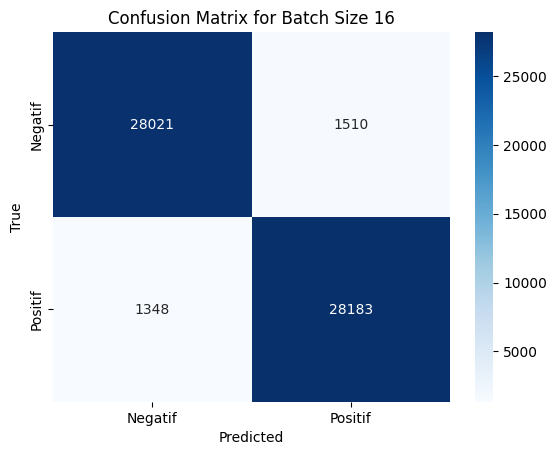

Classification Report for Batch Size 16:
              precision    recall  f1-score   support

     Negatif       0.95      0.95      0.95     29531
     Positif       0.95      0.95      0.95     29531

    accuracy                           0.95     59062
   macro avg       0.95      0.95      0.95     59062
weighted avg       0.95      0.95      0.95     59062


Training with Batch Size = 32


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training:   1%|▏         | 100/7383 [01:04<1:16:46,  1.58batch/s]

Batch 100/7383, Loss: 0.3781096041202545


Training:   3%|▎         | 200/7383 [02:08<1:17:22,  1.55batch/s]

Batch 200/7383, Loss: 0.2611934244632721


Training:   4%|▍         | 300/7383 [03:12<1:17:29,  1.52batch/s]

Batch 300/7383, Loss: 0.07868801802396774


Training:   5%|▌         | 400/7383 [04:16<1:15:07,  1.55batch/s]

Batch 400/7383, Loss: 0.08371187746524811


Training:   7%|▋         | 500/7383 [05:20<1:15:52,  1.51batch/s]

Batch 500/7383, Loss: 0.44760897755622864


Training:   8%|▊         | 600/7383 [06:28<1:31:08,  1.24batch/s]

Batch 600/7383, Loss: 0.25729653239250183


Training:   9%|▉         | 700/7383 [07:33<1:10:34,  1.58batch/s]

Batch 700/7383, Loss: 0.06416511535644531


Training:  11%|█         | 800/7383 [08:40<1:10:10,  1.56batch/s]

Batch 800/7383, Loss: 0.10439711064100266


Training:  12%|█▏        | 900/7383 [09:46<1:11:17,  1.52batch/s]

Batch 900/7383, Loss: 0.053170014172792435


Training:  14%|█▎        | 1000/7383 [10:50<1:07:18,  1.58batch/s]

Batch 1000/7383, Loss: 0.22166411578655243


Training:  15%|█▍        | 1100/7383 [11:54<1:07:35,  1.55batch/s]

Batch 1100/7383, Loss: 0.15176238119602203


Training:  16%|█▋        | 1200/7383 [12:58<1:07:04,  1.54batch/s]

Batch 1200/7383, Loss: 0.07617567479610443


Training:  18%|█▊        | 1300/7383 [14:04<1:04:19,  1.58batch/s]

Batch 1300/7383, Loss: 0.1283007711172104


Training:  19%|█▉        | 1400/7383 [15:08<1:06:12,  1.51batch/s]

Batch 1400/7383, Loss: 0.11458588391542435


Training:  20%|██        | 1500/7383 [16:12<1:01:55,  1.58batch/s]

Batch 1500/7383, Loss: 0.06907905638217926


Training:  22%|██▏       | 1600/7383 [17:16<1:02:20,  1.55batch/s]

Batch 1600/7383, Loss: 0.1113128513097763


Training:  23%|██▎       | 1700/7383 [18:21<1:11:32,  1.32batch/s]

Batch 1700/7383, Loss: 0.20390555262565613


Training:  24%|██▍       | 1800/7383 [19:27<59:20,  1.57batch/s]

Batch 1800/7383, Loss: 0.16126807034015656


Training:  26%|██▌       | 1900/7383 [20:31<58:57,  1.55batch/s]

Batch 1900/7383, Loss: 0.2311137169599533


Training:  27%|██▋       | 2000/7383 [21:35<58:07,  1.54batch/s]

Batch 2000/7383, Loss: 0.2033126950263977


Training:  28%|██▊       | 2100/7383 [22:39<55:56,  1.57batch/s]

Batch 2100/7383, Loss: 0.038237690925598145


Training:  30%|██▉       | 2200/7383 [23:43<56:37,  1.53batch/s]

Batch 2200/7383, Loss: 0.12080175429582596


Training:  31%|███       | 2300/7383 [24:47<54:10,  1.56batch/s]

Batch 2300/7383, Loss: 0.06566177308559418


Training:  33%|███▎      | 2400/7383 [25:51<53:47,  1.54batch/s]

Batch 2400/7383, Loss: 0.047815777361392975


Training:  34%|███▍      | 2500/7383 [26:55<54:12,  1.50batch/s]

Batch 2500/7383, Loss: 0.13085409998893738


Training:  35%|███▌      | 2600/7383 [27:59<50:43,  1.57batch/s]

Batch 2600/7383, Loss: 0.032532576471567154


Training:  37%|███▋      | 2700/7383 [29:03<50:07,  1.56batch/s]

Batch 2700/7383, Loss: 0.058392781764268875


Training:  38%|███▊      | 2800/7383 [30:07<49:36,  1.54batch/s]

Batch 2800/7383, Loss: 0.28187325596809387


Training:  38%|███▊      | 2837/7383 [30:32<48:57,  1.55batch/s]


KeyboardInterrupt: 

In [ ]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Load dataset
train_split = pd.read_csv('/content/drive/MyDrive/PDS_Kelompok_4/split_data/train_split.csv')
test_split = pd.read_csv('/content/drive/MyDrive/PDS_Kelompok_4/split_data/test_split.csv')

X_train = train_split['review_text']
y_train = train_split['label']
X_test = test_split['review_text']
y_test = test_split['label']

# Create dataset objects
train_dataset = SentimentDataset(X_train, y_train, tokenizer, max_length=128)
test_dataset = SentimentDataset(X_test, y_test, tokenizer, max_length=128)

# Model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model = model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
def train_model(model, train_dataloader, optimizer, device, epoch=3):
    model.train()

    # Use tqdm to create a progress bar for the training loop
    for batch_idx, batch in enumerate(tqdm(train_dataloader, desc="Training", unit="batch")):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 100 == 0:
            print(f"Batch {batch_idx+1}/{len(train_dataloader)}, Loss: {loss.item()}")

    return model

# Evaluate model
def evaluate_model(model, test_dataloader, device):
    model.eval()
    preds = []
    labels = []
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            label = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            pred = torch.argmax(logits, dim=1)

            preds.extend(pred.cpu().numpy())
            labels.extend(label.cpu().numpy())

    return preds, labels

# Menentukan batch sizes
batch_sizes = [16, 32, 128]
results = {}

# Latih model dengan batch size yang berbeda
for batch_size in batch_sizes:
    print(f"\nTraining with Batch Size = {batch_size}")

    # Create DataLoader for each batch size
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

    # Reset the model and optimizer for each batch size
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
    model = model.to(device)
    optimizer = AdamW(model.parameters(), lr=2e-5)

    # Train the model
    model = train_model(model, train_dataloader, optimizer, device, epoch=3)

    # Save checkpoint
    torch.save(model.state_dict(), f'/content/drive/MyDrive/PDS_Kelompok_4/models/bert_sentiment_model_batch_{batch_size}.pth')

    # Evaluate the model
    preds, labels = evaluate_model(model, test_dataloader, device)

    # Store results for comparison
    cm = confusion_matrix(labels, preds)
    report = classification_report(labels, preds, target_names=['Negatif', 'Positif'])

    results[batch_size] = {'confusion_matrix': cm, 'classification_report': report}

    print(f"Confusion Matrix for Batch Size {batch_size}:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
    plt.title(f'Confusion Matrix for Batch Size {batch_size}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print(f"Classification Report for Batch Size {batch_size}:\n{report}")

print("\nComparison of Results for Different Batch Sizes:")
for batch_size, result in results.items():
    print(f"\nBatch Size: {batch_size}")
    print("Confusion Matrix:\n", result['confusion_matrix'])
    print("\nClassification Report:\n", result['classification_report'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Training with Batch Size = 64
Epoch 1/1


Training:   3%|▎         | 100/3692 [02:05<1:17:38,  1.30s/batch]

Batch 100/3692, Loss: 0.1588221788406372


Training:   5%|▌         | 200/3692 [04:20<1:17:59,  1.34s/batch]

Batch 200/3692, Loss: 0.20797576010227203


Training:   8%|▊         | 300/3692 [06:34<1:17:45,  1.38s/batch]

Batch 300/3692, Loss: 0.1070917546749115


Training:  11%|█         | 400/3692 [08:49<1:12:57,  1.33s/batch]

Batch 400/3692, Loss: 0.1983930766582489


Training:  14%|█▎        | 500/3692 [11:03<1:12:10,  1.36s/batch]

Batch 500/3692, Loss: 0.20024700462818146


Training:  16%|█▋        | 600/3692 [13:18<1:09:59,  1.36s/batch]

Batch 600/3692, Loss: 0.21458010375499725


Training:  19%|█▉        | 700/3692 [15:32<1:06:31,  1.33s/batch]

Batch 700/3692, Loss: 0.1945774406194687


Training:  22%|██▏       | 800/3692 [17:47<1:05:12,  1.35s/batch]

Batch 800/3692, Loss: 0.13397783041000366


Training:  24%|██▍       | 900/3692 [20:01<1:03:36,  1.37s/batch]

Batch 900/3692, Loss: 0.21801993250846863


Training:  27%|██▋       | 1000/3692 [22:15<1:00:04,  1.34s/batch]

Batch 1000/3692, Loss: 0.1819549947977066


Training:  30%|██▉       | 1100/3692 [24:30<59:25,  1.38s/batch]

Batch 1100/3692, Loss: 0.10641498118638992


Training:  33%|███▎      | 1200/3692 [26:44<55:10,  1.33s/batch]

Batch 1200/3692, Loss: 0.12352203577756882


Training:  35%|███▌      | 1300/3692 [28:58<53:45,  1.35s/batch]

Batch 1300/3692, Loss: 0.11545323580503464


Training:  38%|███▊      | 1400/3692 [31:13<51:32,  1.35s/batch]

Batch 1400/3692, Loss: 0.15554091334342957


Training:  41%|████      | 1500/3692 [33:27<48:54,  1.34s/batch]

Batch 1500/3692, Loss: 0.12905867397785187


Training:  43%|████▎     | 1600/3692 [35:41<48:25,  1.39s/batch]

Batch 1600/3692, Loss: 0.2584353983402252


Training:  46%|████▌     | 1700/3692 [37:55<44:13,  1.33s/batch]

Batch 1700/3692, Loss: 0.15905848145484924


Training:  49%|████▉     | 1800/3692 [40:10<42:06,  1.34s/batch]

Batch 1800/3692, Loss: 0.22795236110687256


Training:  51%|█████▏    | 1900/3692 [42:24<40:52,  1.37s/batch]

Batch 1900/3692, Loss: 0.030188698321580887


Training:  54%|█████▍    | 2000/3692 [44:39<37:46,  1.34s/batch]

Batch 2000/3692, Loss: 0.0862889513373375


Training:  57%|█████▋    | 2100/3692 [46:53<36:01,  1.36s/batch]

Batch 2100/3692, Loss: 0.07679186761379242


Training:  60%|█████▉    | 2200/3692 [49:07<33:01,  1.33s/batch]

Batch 2200/3692, Loss: 0.12421476095914841


Training:  62%|██████▏   | 2300/3692 [51:21<31:05,  1.34s/batch]

Batch 2300/3692, Loss: 0.0952530950307846


Training:  65%|██████▌   | 2400/3692 [53:36<29:39,  1.38s/batch]

Batch 2400/3692, Loss: 0.05828302726149559


Training:  68%|██████▊   | 2500/3692 [55:50<26:25,  1.33s/batch]

Batch 2500/3692, Loss: 0.13141633570194244


Training:  70%|███████   | 2600/3692 [58:04<24:32,  1.35s/batch]

Batch 2600/3692, Loss: 0.12339805066585541


Training:  73%|███████▎  | 2700/3692 [1:00:19<22:38,  1.37s/batch]

Batch 2700/3692, Loss: 0.11070942133665085


Training:  76%|███████▌  | 2800/3692 [1:02:33<19:49,  1.33s/batch]

Batch 2800/3692, Loss: 0.2660830318927765


Training:  79%|███████▊  | 2900/3692 [1:04:47<17:52,  1.35s/batch]

Batch 2900/3692, Loss: 0.27684444189071655


Training:  81%|████████▏ | 3000/3692 [1:07:01<15:47,  1.37s/batch]

Batch 3000/3692, Loss: 0.07673250883817673


Training:  84%|████████▍ | 3100/3692 [1:09:16<13:05,  1.33s/batch]

Batch 3100/3692, Loss: 0.06769789755344391


Training:  87%|████████▋ | 3200/3692 [1:11:30<11:01,  1.35s/batch]

Batch 3200/3692, Loss: 0.10073698312044144


Training:  89%|████████▉ | 3300/3692 [1:13:44<08:57,  1.37s/batch]

Batch 3300/3692, Loss: 0.30232274532318115


Training:  92%|█████████▏| 3400/3692 [1:15:58<06:28,  1.33s/batch]

Batch 3400/3692, Loss: 0.2573392391204834


Training:  95%|█████████▍| 3500/3692 [1:18:13<04:18,  1.34s/batch]

Batch 3500/3692, Loss: 0.09494196623563766


Training:  98%|█████████▊| 3600/3692 [1:20:27<02:04,  1.36s/batch]

Batch 3600/3692, Loss: 0.09492853283882141


Training: 100%|██████████| 3692/3692 [1:22:30<00:00,  1.34s/batch]


Model saved to /content/drive/MyDrive/PDS_Kelompok_4/models/bert_sentiment_model_final_64_batch.pth
Confusion Matrix:
 [[28773   758]
 [ 2123 27408]]


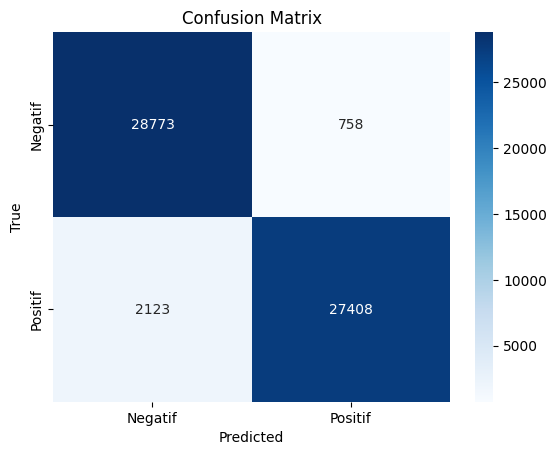


Classification Report:
               precision    recall  f1-score   support

     Negatif       0.93      0.97      0.95     29531
     Positif       0.97      0.93      0.95     29531

    accuracy                           0.95     59062
   macro avg       0.95      0.95      0.95     59062
weighted avg       0.95      0.95      0.95     59062



In [ ]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Load dataset
train_split = pd.read_csv('/content/drive/MyDrive/PDS_Kelompok_4/split_data/train_split.csv')
test_split = pd.read_csv('/content/drive/MyDrive/PDS_Kelompok_4/split_data/test_split.csv')

X_train = train_split['review_text']
y_train = train_split['label']
X_test = test_split['review_text']
y_test = test_split['label']

# Create dataset objects
train_dataset = SentimentDataset(X_train, y_train, tokenizer, max_length=128)
test_dataset = SentimentDataset(X_test, y_test, tokenizer, max_length=128)

# Model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model = model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Function to save final model
def save_final_model(model, save_path):
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")

# Training loop
def train_model(model, train_dataloader, optimizer, device, epochs=1):
    model.train()
    for epoch_num in range(epochs):
        print(f"Epoch {epoch_num+1}/{epochs}")
        for batch_idx, batch in enumerate(tqdm(train_dataloader, desc="Training", unit="batch")):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

            if (batch_idx + 1) % 100 == 0:
                print(f"Batch {batch_idx+1}/{len(train_dataloader)}, Loss: {loss.item()}")

    return model

# Evaluate model
def evaluate_model(model, test_dataloader, device):
    model.eval()
    preds = []
    labels = []
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            label = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            pred = torch.argmax(logits, dim=1)

            preds.extend(pred.cpu().numpy())
            labels.extend(label.cpu().numpy())

    return preds, labels

# Menentukan batch size 64
batch_size = 64
print(f"\nTraining with Batch Size = {batch_size}")

# Create DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Train the model
model = train_model(model, train_dataloader, optimizer, device, epochs=1)

# Save final model
save_path = '/content/drive/MyDrive/PDS_Kelompok_4/models/bert_sentiment_model_final_64_batch.pth'
save_final_model(model, save_path)

# Evaluate the model
preds, labels = evaluate_model(model, test_dataloader, device)

# Confusion Matrix and Classification Report
cm = confusion_matrix(labels, preds)
report = classification_report(labels, preds, target_names=['Negatif', 'Positif'])

# Display results
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nClassification Report:\n", report)

Contoh tingkat kepuasan pelanggan

In [ ]:
# Baca file CSV
test_df = pd.read_csv('/content/drive/MyDrive/test_with_sentiment_3.csv')
train_df = pd.read_csv('/content/drive/MyDrive/train_with_sentiment_3.csv')

# Gabungkan kedua DataFrame
combined_df = pd.concat([test_df, train_df], ignore_index=True)

# Simpan hasil ke file CSV baru
output_path = '/content/drive/MyDrive/combined_with_sentiment_3.csv'
combined_df.to_csv(output_path, index=False)

print(f"File gabungan telah disimpan di {output_path}")


File gabungan telah disimpan di /content/drive/MyDrive/combined_with_sentiment_3.csv


In [ ]:
combinedDf = pd.read_csv('/content/drive/MyDrive/combined_with_sentiment_3.csv')

In [ ]:
combinedDf.shape

(295308, 5)

### LogReg x BERT

In [ ]:
# Ganti 'Nama Produk' dengan nama produk yang ingin Anda analisis
product_name = ['Lippe Balm',
                'Mini GOOPGLOW Microderm Instant Glow Exfoliator',
                'Mini First Care Activating Serum',
                ]

for nama_produk in product_name:
    # Filter data berdasarkan nama produk
    product_data = combinedDf[combinedDf['product_name'] == nama_produk]

    # Menghitung total jumlah ulasan untuk produk tersebut
    total_reviews = len(product_data)

    # Menghitung persentase `label` dengan nilai 1
    label_1_count = product_data[product_data['label'] == 1].shape[0]
    label_1_percentage = (label_1_count / total_reviews) * 100

    # Menghitung persentase `sentiment` dengan nilai 1
    sentiment_1_count = product_data[product_data['sentiment'] == 1].shape[0]
    sentiment_1_percentage = (sentiment_1_count / total_reviews) * 100

    # Menghitung rata-rata rating
    average_rating = product_data['rating'].mean()

    # Menampilkan hasil
    print(f"Analisis untuk Produk: {nama_produk}")
    print(f"Total Ulasan: {total_reviews}")

    print(f"Tingkat kepuasan konsumen berdasarkan fitur Label: {label_1_percentage:.2f}%")
    print(f"Tingkat kepuasan konsumen berdasarkan fitur Sentiment: {sentiment_1_percentage:.2f}%")
    print(f"Rating: {average_rating:.2f} dari 5\n\n")

Analisis untuk Produk: Lippe Balm
Total Ulasan: 769
Tingkat kepuasan konsumen berdasarkan fitur Label: 23.93%
Tingkat kepuasan konsumen berdasarkan fitur Sentiment: 25.23%
Rating: 2.72 dari 5


Analisis untuk Produk: Mini GOOPGLOW Microderm Instant Glow Exfoliator
Total Ulasan: 583
Tingkat kepuasan konsumen berdasarkan fitur Label: 63.81%
Tingkat kepuasan konsumen berdasarkan fitur Sentiment: 60.38%
Rating: 3.96 dari 5


Analisis untuk Produk: Mini First Care Activating Serum
Total Ulasan: 255
Tingkat kepuasan konsumen berdasarkan fitur Label: 68.63%
Tingkat kepuasan konsumen berdasarkan fitur Sentiment: 71.37%
Rating: 4.05 dari 5




### Word Cloud

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [ ]:
# Data dengan label = 1
text_label_1 = " ".join(combinedDf[combinedDf['label'] == 1]['review_text'].astype(str))

# Data dengan label = 0
text_label_0 = " ".join(combinedDf[combinedDf['label'] == 0]['review_text'].astype(str))

# Semua data (total)
total_text = " ".join(combinedDf['review_text'].astype(str))


In [ ]:
stopwords = set(STOPWORDS)

wordcloud_total = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(total_text)

wordcloud_label_1 = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_label_1)

wordcloud_label_0 = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_label_0)


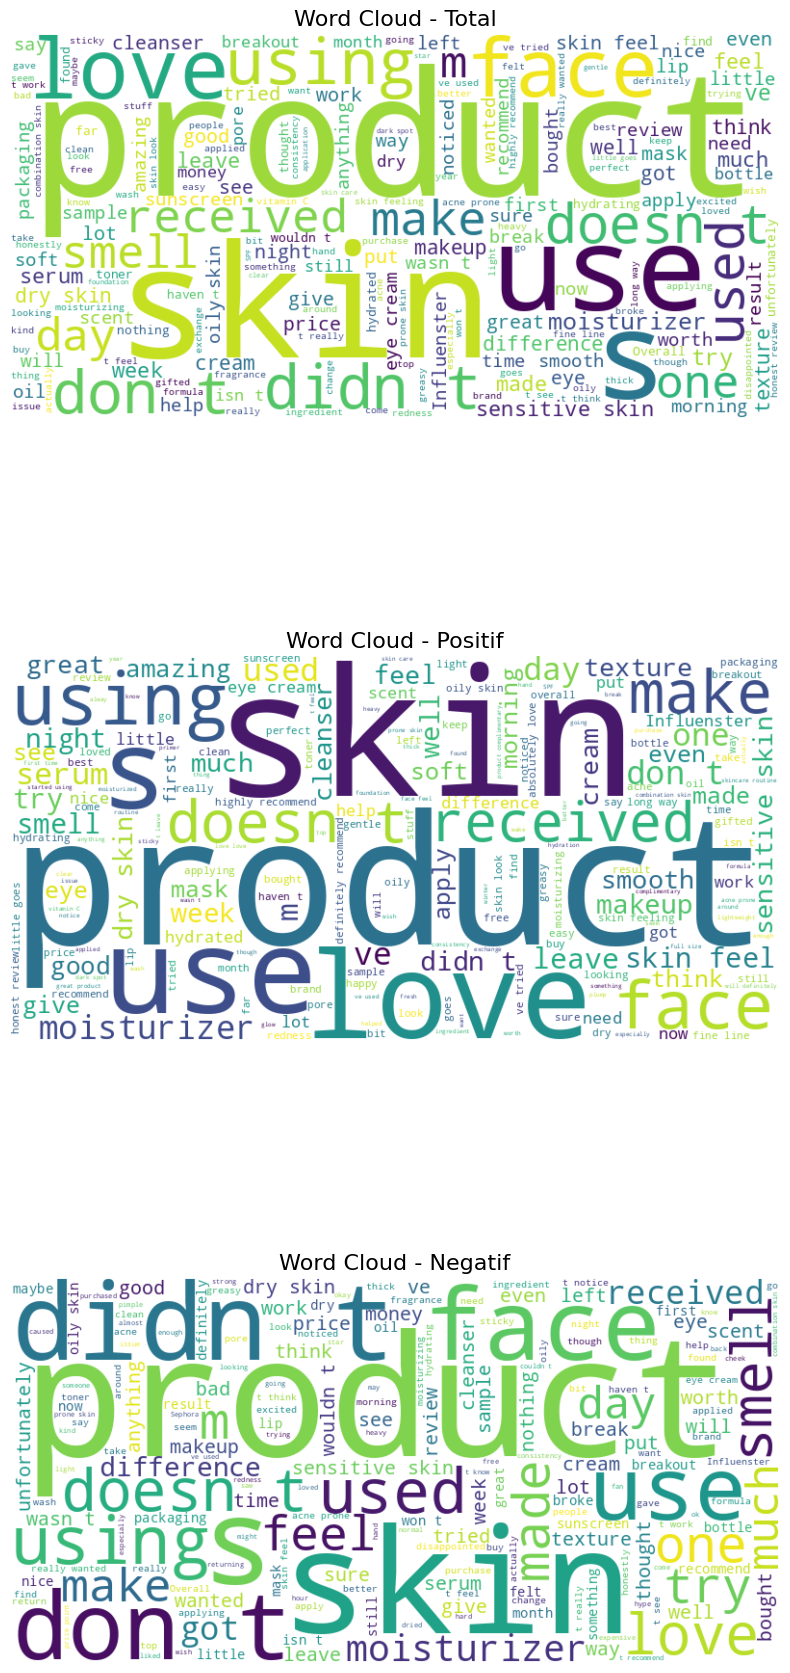

In [ ]:
# Plot hasil
fig, ax = plt.subplots(3, 1, figsize=(8, 20))

# Total
ax[0].imshow(wordcloud_total, interpolation='bilinear')
ax[0].set_title("Word Cloud - Total", fontsize=16)
ax[0].axis('off')

# Label = 1
ax[1].imshow(wordcloud_label_1, interpolation='bilinear')
ax[1].set_title("Word Cloud - Positif", fontsize=16)
ax[1].axis('off')

# Label = 0
ax[2].imshow(wordcloud_label_0, interpolation='bilinear')
ax[2].set_title("Word Cloud - Negatif", fontsize=16)
ax[2].axis('off')

plt.tight_layout()
plt.show()

### Perbandingan Sentiment

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset
import numpy as np

# Tentukan device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Path model BERT
save_path = '/content/drive/MyDrive/PDS_Kelompok_4/models/bert_sentiment_model_final_64_batch.pth'

# Muat model dan tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.load_state_dict(torch.load(save_path, map_location=device))
model.to(device)  # Pindahkan model ke device
model.eval()

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Muat DataFrame
combinedDf = pd.read_csv('/content/drive/MyDrive/combined_with_sentiment_3.csv')

# Pastikan kolom review_text ada
if 'review_text' not in combinedDf.columns:
    raise ValueError("Kolom 'review_text' tidak ditemukan dalam DataFrame!")

# Dataset Kustom
class ReviewDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        tokens = self.tokenizer(
            text,
            return_tensors='pt',
            truncation=True,
            padding='max_length',
            max_length=self.max_length
        )
        return tokens

# Buat Dataset dan DataLoader
batch_size = 64
dataset = ReviewDataset(combinedDf['review_text'].tolist(), tokenizer)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Proses Prediksi dalam Batch
all_preds = []

print("Running inference...")
for batch in tqdm(dataloader, desc="Processing Batches"):
    input_ids = batch['input_ids'].squeeze(1).to(device)
    attention_mask = batch['attention_mask'].squeeze(1).to(device)

    # Inferensi model
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probs = torch.softmax(outputs.logits, dim=-1)
        preds = torch.argmax(probs, dim=-1).cpu().numpy()

    all_preds.extend(preds)

# Tambahkan kolom prediksi ke DataFrame
combinedDf['sentiment_bert'] = all_preds

# Simpan hasil ke file baru
output_path = '/content/drive/MyDrive/combined_with_sentiment_bert.csv'
combinedDf.to_csv(output_path, index=False)

print(f"Hasil prediksi disimpan ke: {output_path}")

Using device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-7-f892f1b446b4>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We reco

Running inference...


Processing Batches: 100%|██████████| 4615/4615 [40:39<00:00,  1.89it/s]


Hasil prediksi disimpan ke: /content/drive/MyDrive/combined_with_sentiment_bert.csv


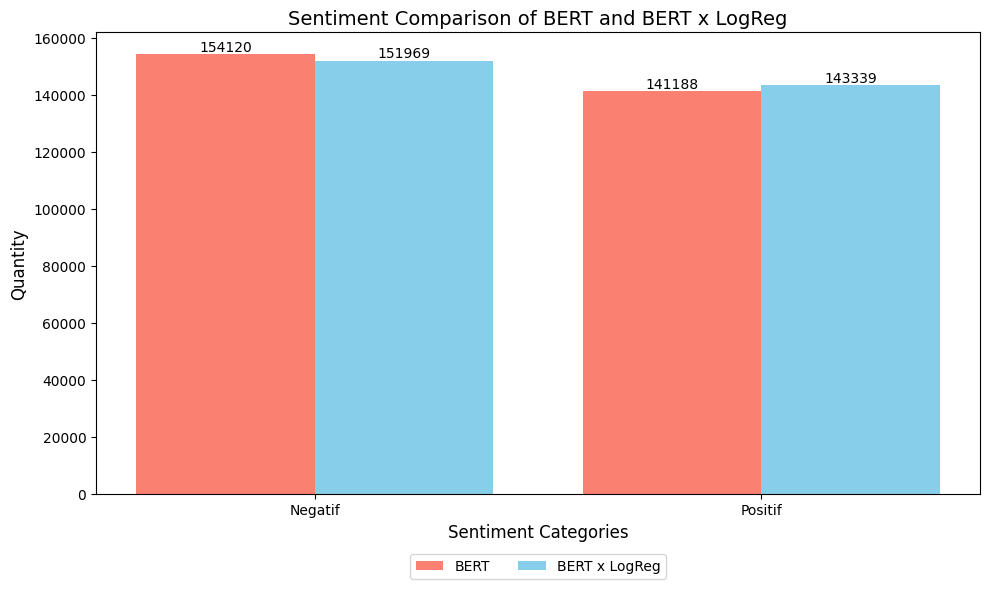

In [ ]:
combinedDf = pd.read_csv('/content/drive/MyDrive/combined_with_sentiment_bert.csv')

# Hitung frekuensi sentiment asli dan sentiment_bert
sentiment_counts = combinedDf['sentiment'].value_counts()
sentiment_bert_counts = combinedDf['sentiment_bert'].value_counts()

# Pastikan index 0 dan 1 ada untuk konsistensi
sentiment_counts = sentiment_counts.reindex([0, 1], fill_value=0)
sentiment_bert_counts = sentiment_bert_counts.reindex([0, 1], fill_value=0)

# Label untuk x-axis
categories = ['Negatif', 'Positif']

# Data
x = np.arange(len(categories))  # Posisi bar
width = 0.4  # Lebar bar

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar untuk BERT
bars1 = ax.bar(x - width/2, sentiment_bert_counts.values, width, label='BERT', color='salmon')

# Bar untuk BERT x LogReg
bars2 = ax.bar(x + width/2, sentiment_counts.values, width, label='BERT x LogReg', color='skyblue')

# Tambahkan jumlah di atas tiap bar
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, str(bar.get_height()), ha='center', va='bottom', fontsize=10)

for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, str(bar.get_height()), ha='center', va='bottom', fontsize=10)

# Format grafik
ax.set_title('Sentiment Comparison of BERT and BERT x LogReg', fontsize=14)
ax.set_xlabel('Sentiment Categories', fontsize=12)
ax.set_ylabel('Quantity', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.tight_layout()
plt.show()

### BERT

In [ ]:
# Load data
combinedDf = pd.read_csv('/content/drive/MyDrive/combined_with_sentiment_bert.csv')

# Daftar nama produk yang akan dianalisis
product_name = [
    'Lippe Balm',
    'Mini GOOPGLOW Microderm Instant Glow Exfoliator',
    'Mini First Care Activating Serum',
]

# Loop untuk setiap nama produk
for nama_produk in product_name:
    # Filter data berdasarkan nama produk
    product_data = combinedDf[combinedDf['product_name'] == nama_produk]

    # Menghitung total jumlah ulasan untuk produk tersebut
    total_reviews = len(product_data)

    # Menghitung persentase `label` dengan nilai 1
    label_1_count = product_data[product_data['label'] == 1].shape[0]
    label_1_percentage = (label_1_count / total_reviews) * 100

    # Menghitung persentase `sentiment` BERT dengan nilai 1
    sentiment_1_count = product_data[product_data['sentiment_bert'] == 1].shape[0]
    bert_sentiment_1_percentage = (sentiment_1_count / total_reviews) * 100

    # Menghitung persentase `sentiment` BERT x LogReg dengan nilai 1
    sentiment_1_count = product_data[product_data['sentiment'] == 1].shape[0]
    bert_x_logreg_sentiment_1_percentage = (sentiment_1_count / total_reviews) * 100

    # Menghitung rata-rata rating
    average_rating = product_data['rating'].mean()

    # Menghitung persentase rating berdasarkan total nilai maksimum rating (5)
    rating_percentage = (average_rating / 5) * 100

    # Menampilkan hasil
    print(f"Analyze for Product: {nama_produk}")
    print(f"Total Reviews: {total_reviews}")
    print(f"Rating: {average_rating:.2f} from 5")
    print(f"Percentage of Rating: {rating_percentage:.2f}%")
    print(f"Percentage of customer satisfaction level based on Label feature: {label_1_percentage:.2f}%")
    print(f"Percentage of customer satisfaction level based on BERT Sentiment feature: {bert_sentiment_1_percentage:.2f}%")
    print(f"Percentage of customer satisfaction level based on BERT x LogReg Sentiment feature: {bert_x_logreg_sentiment_1_percentage:.2f}%\n\n")

Analyze for Product: Lippe Balm
Total Reviews: 769
Rating: 2.72 from 5
Percentage of Rating: 54.36%
Percentage of customer satisfaction level based on Label feature: 23.93%
Percentage of customer satisfaction level based on BERT Sentiment feature: 22.63%
Percentage of customer satisfaction level based on BERT x LogReg Sentiment feature: 25.23%


Analyze for Product: Mini GOOPGLOW Microderm Instant Glow Exfoliator
Total Reviews: 583
Rating: 3.96 from 5
Percentage of Rating: 79.18%
Percentage of customer satisfaction level based on Label feature: 63.81%
Percentage of customer satisfaction level based on BERT Sentiment feature: 61.75%
Percentage of customer satisfaction level based on BERT x LogReg Sentiment feature: 60.38%


Analyze for Product: Mini First Care Activating Serum
Total Reviews: 255
Rating: 4.05 from 5
Percentage of Rating: 81.10%
Percentage of customer satisfaction level based on Label feature: 68.63%
Percentage of customer satisfaction level based on BERT Sentiment featur